In [35]:
# data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/mpd2020.xlsx"
data_url ="QuantEcon_mpd2020.xlsx"
data = pd.read_excel(data_url, 
                     sheet_name='Full data')
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [36]:
countries = data.country.unique()
len(countries)

169

In [37]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


In [38]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])

In [39]:
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')

In [40]:
gdp_pc.tail()

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


In [41]:
country_names = data['countrycode']

# Generate a colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to its corresponding color
color_mapping = {country: color for 
                 country, color in zip(country_names, colors)}

In [18]:
def draw_interp_plots(series,        # pandas series
                      country,       # list of country codes
                      ylabel,        # label for y-axis
                      xlabel,        # label for x-axis
                      color_mapping, # code-color mapping
                      code_to_name,  # code-name mapping
                      lw,            # line width
                      logscale,      # log scale for y-axis
                      ax             # matplolib axis
                     ):

    for c in country:
        # Get the interpolated data
        df_interpolated = series[c].interpolate(limit_area='inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])

        # Plot the non-interpolated data with solid lines
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]['country'])
        
        if logscale:
            ax.set_yscale('log')
    
    # Draw the legend outside the plot
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

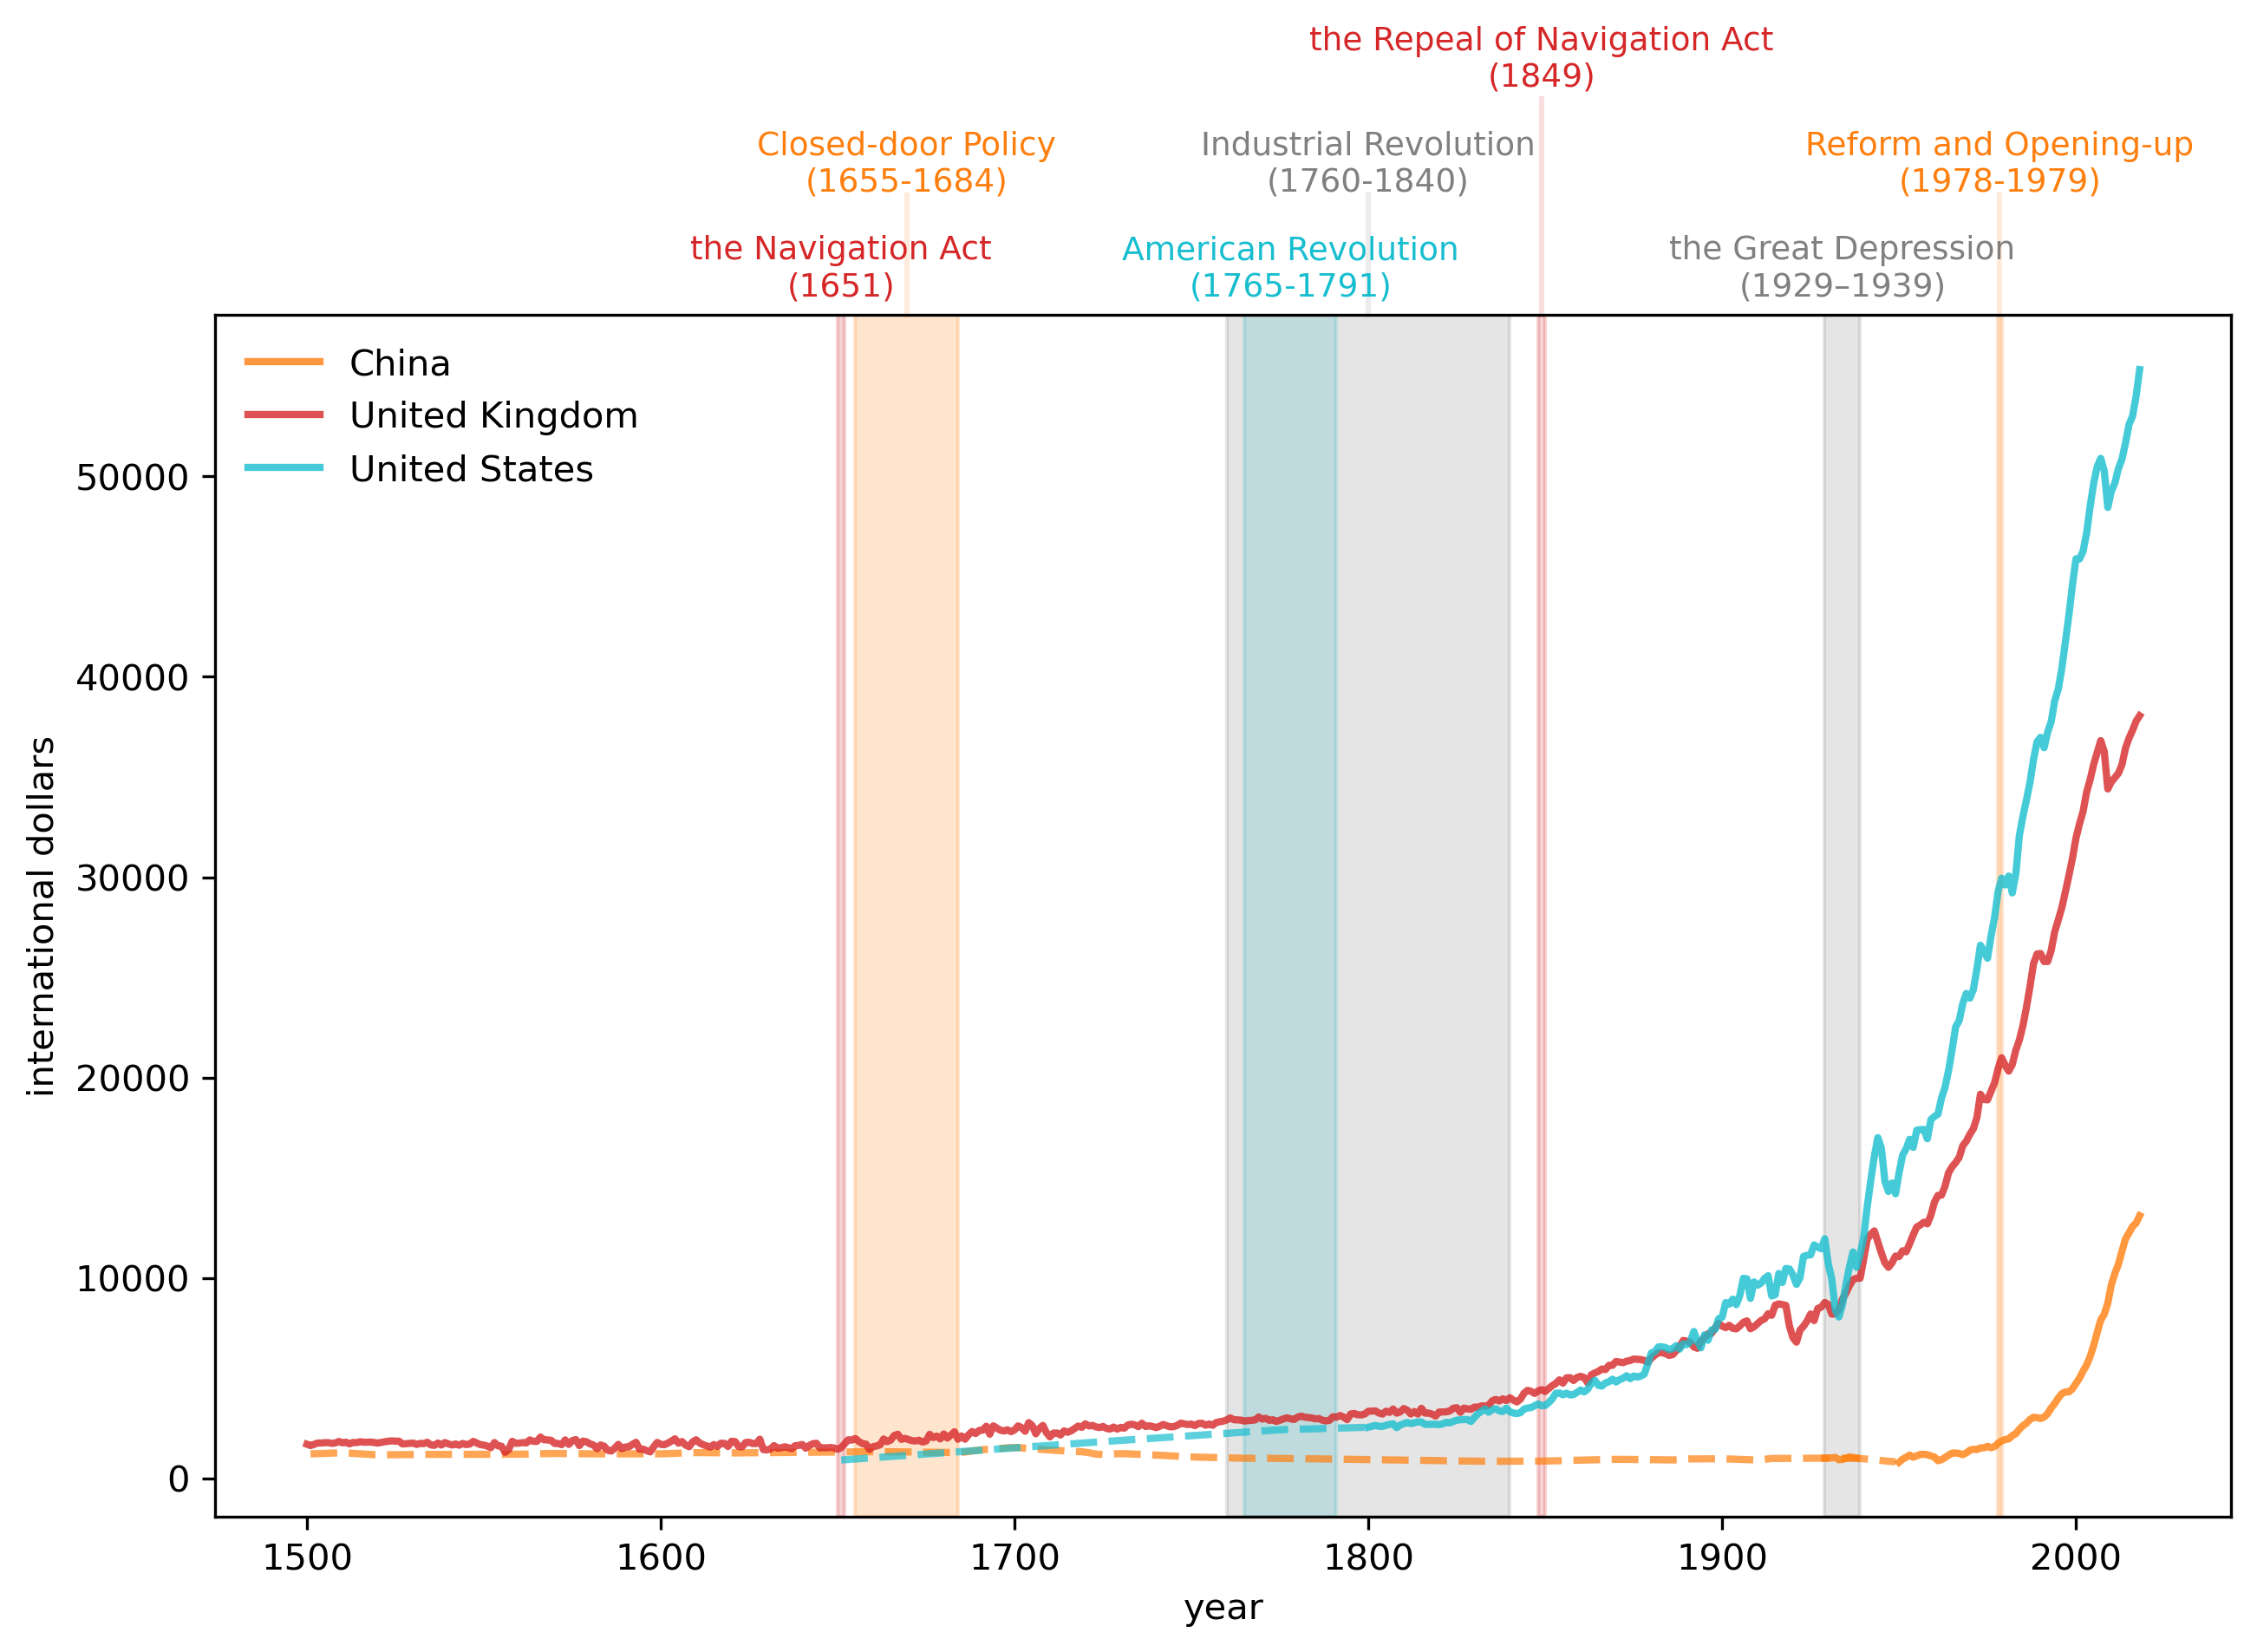

In [19]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN', 'GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim*0.04, 
          'the Navigation Act\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13, 
          'Closed-door Policy\n(1655-1684)', 
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'the Repeal of Navigation Act\n(1849)', 
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

NameError: name 'gdp' is not defined

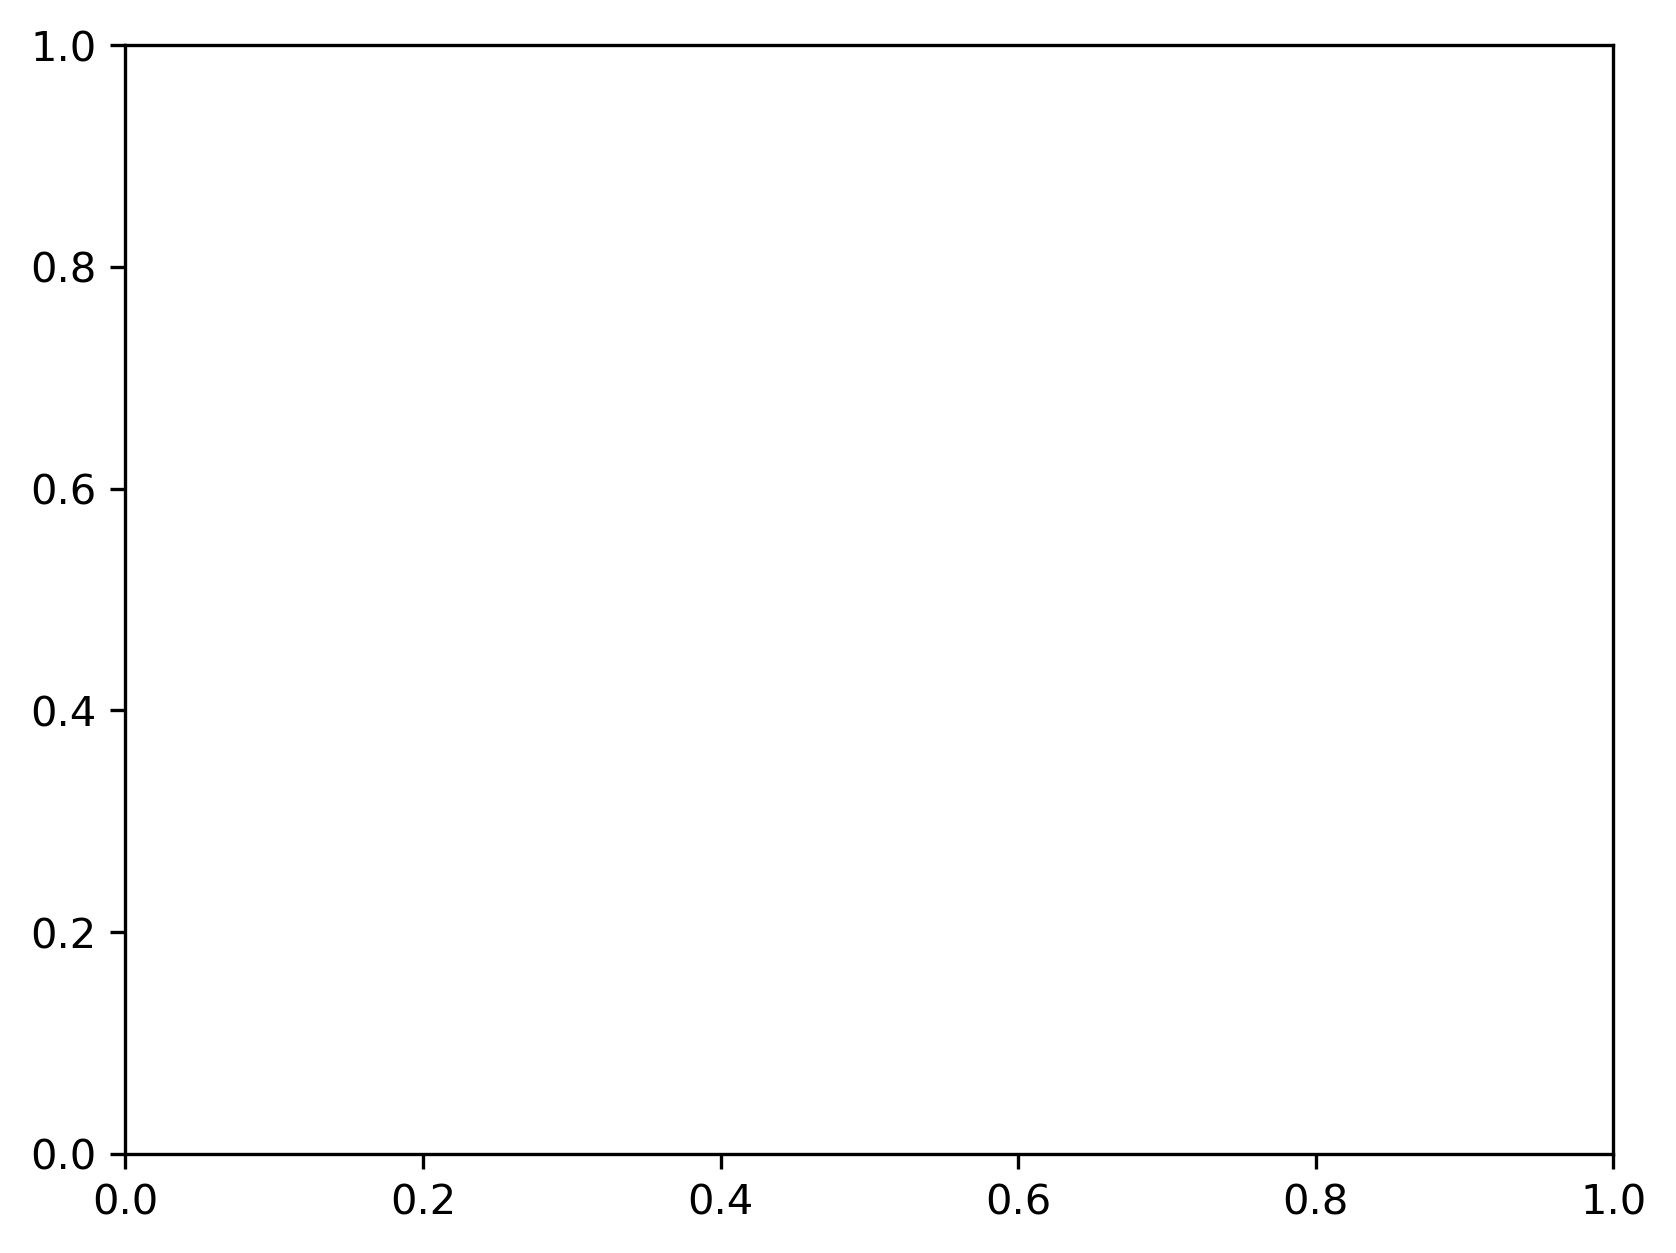

In [25]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

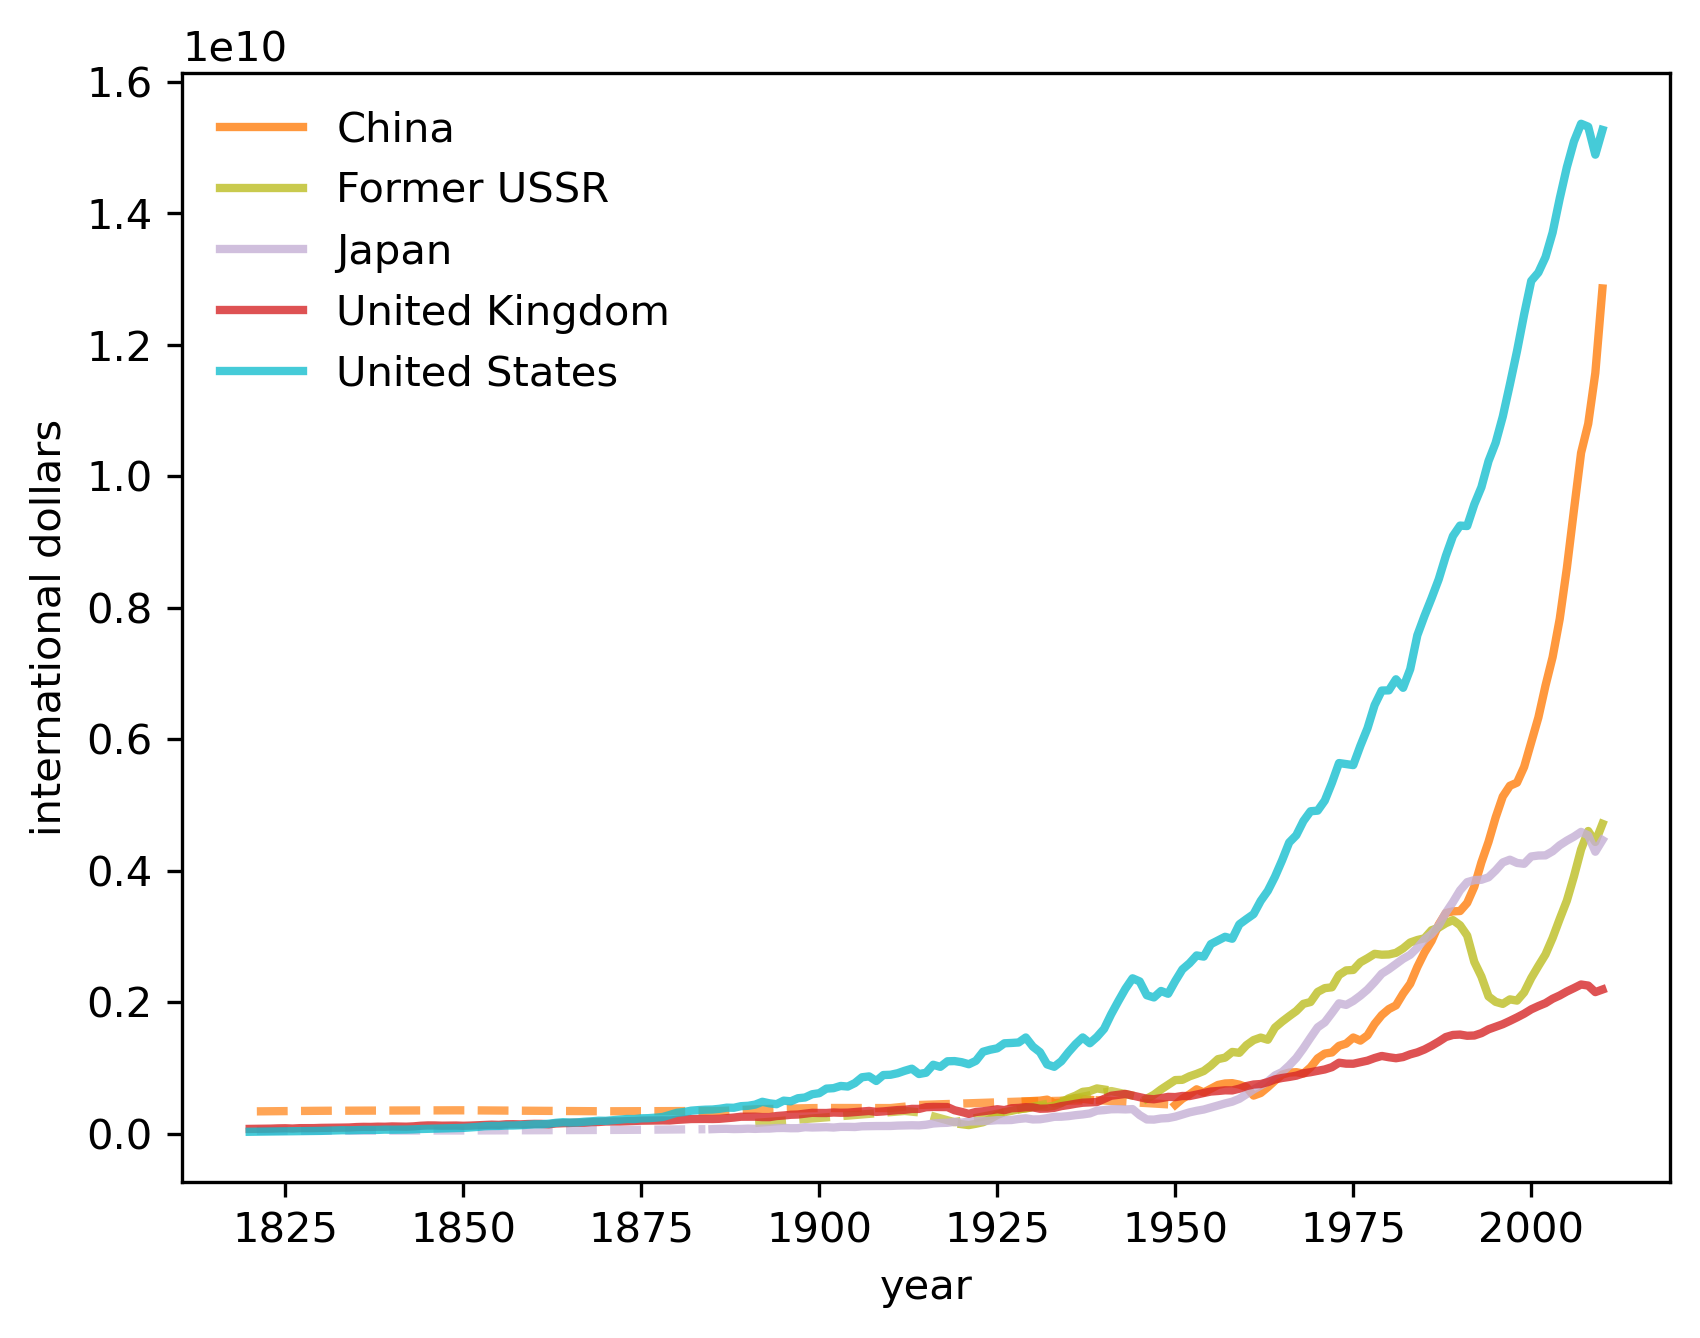

In [20]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 2010)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

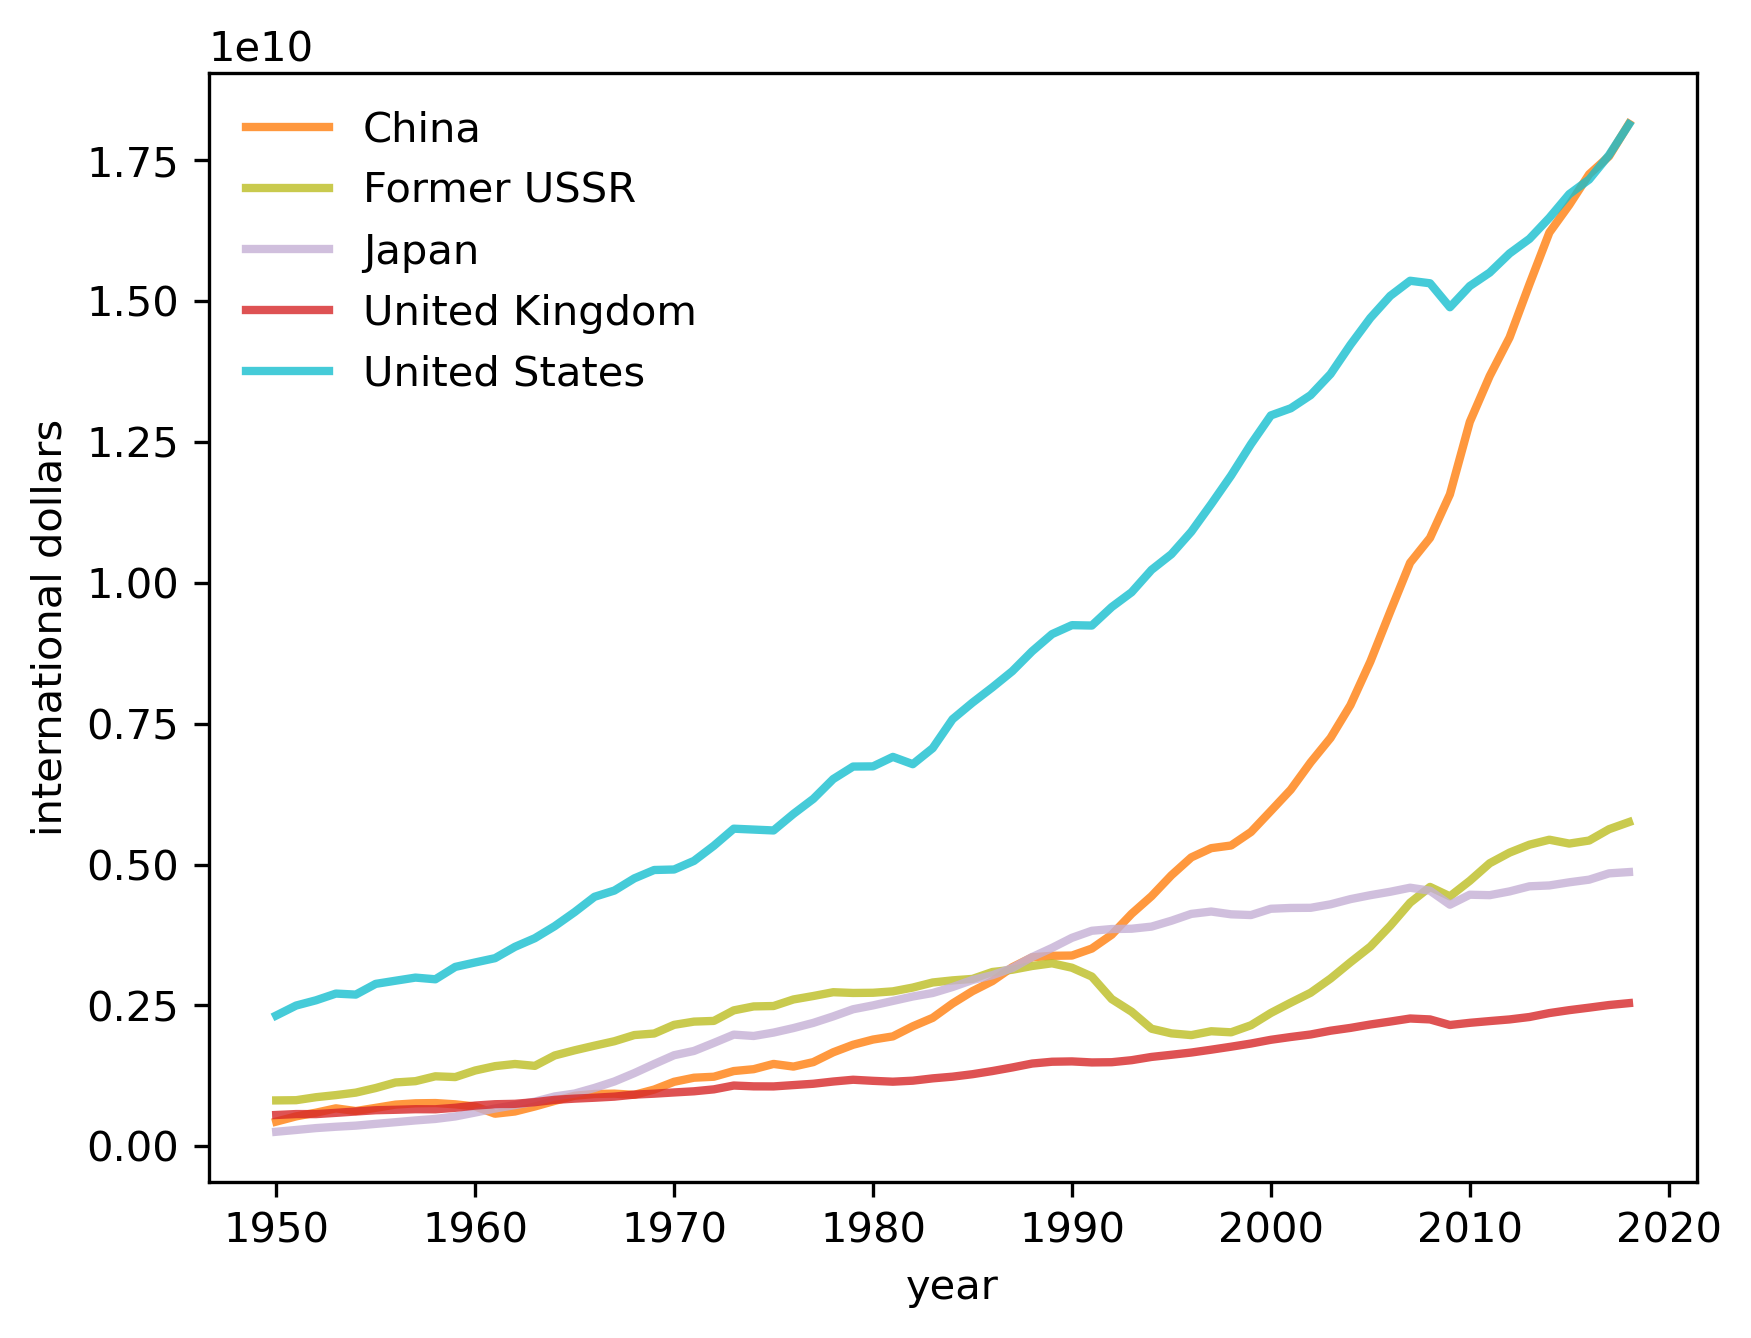

In [21]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

In [22]:
data = pd.read_excel(data_url, 
                     sheet_name='Regional data', 
                     header=(0,1,2),
                     index_col=0)
data.columns = data.columns.droplevel(level=2)

We can save the raw data in a more convenient format to build a single table of regional GDP per capita

In [23]:
regionalgdp_pc = data['gdppc_2011'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

Let’s interpolate based on time to fill in any gaps in the dataset for the purpose of plotting



In [24]:
regionalgdp_pc.interpolate(method='time', inplace=True)

Looking more closely, let’s compare the time series for Western Offshoots and Sub-Saharan Africa with a number of different regions around the world.

Again we see the divergence of the West from the rest of the world after the Industrial Revolution and the convergence of the world after the 1950s

NameError: name 'regionalgdp_pc' is not defined

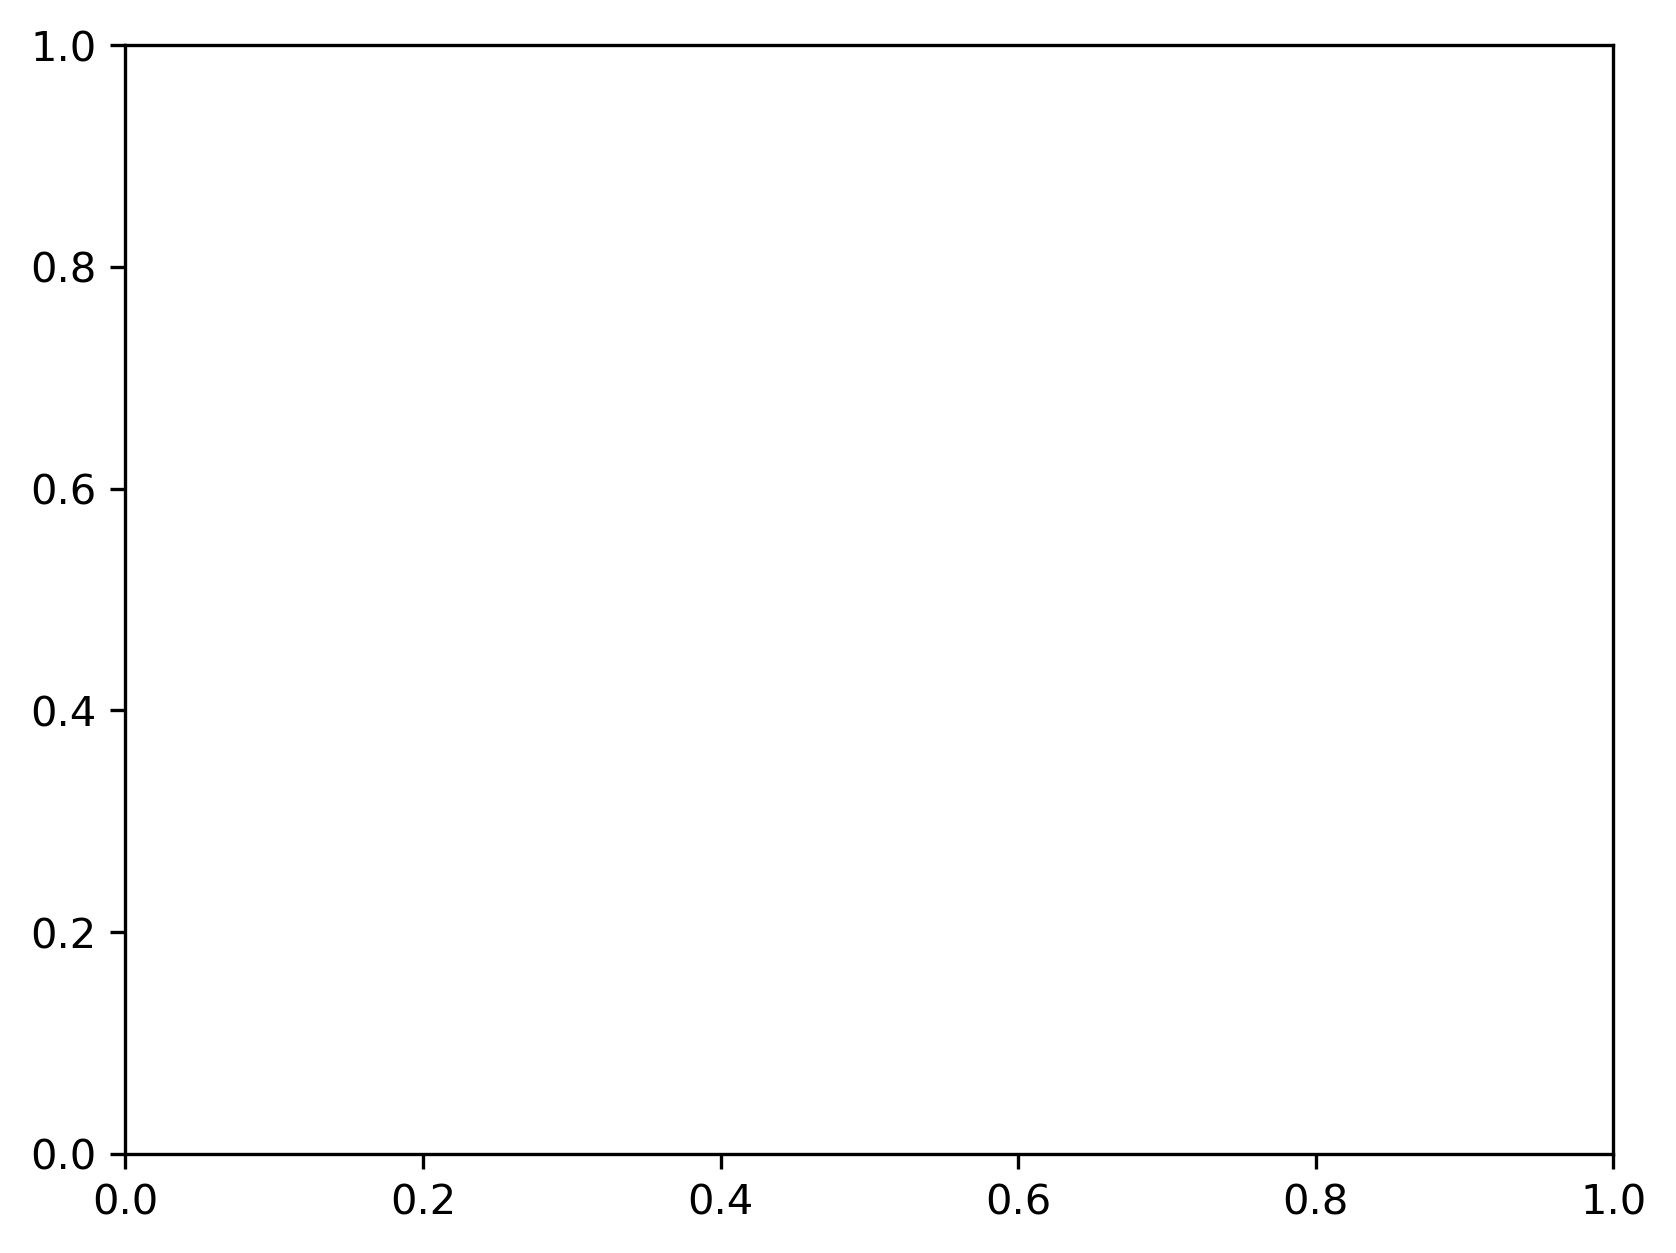

In [29]:
fig, ax = plt.subplots(dpi=300)
regionalgdp_pc.plot(ax=ax, xlabel='year',
                    lw=2,
                    ylabel='international dollars')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import wbgapi as wb
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'wbgapi'

In [27]:
# Set graphical parameters
cycler = plt.cycler(linestyle=['-', '-.', '--', ':'], 
        color=['#377eb8', '#ff7f00', '#4daf4a', '#ff334f'])
plt.rc('axes', prop_cycle=cycler)

In [27]:
wb.series.info(q='GDP growth')

NameError: name 'wb' is not defined

In [26]:
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth

NameError: name 'wb' is not defined

In [30]:
wb.series.metadata.get('NY.GDP.MKTP.KD.ZG')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"An economy's growth is measured by the change in the volume of its output or in the real incomes of its residents. The 2008 United Nations System of National Accounts (2008 SNA) offers three plausible indicators for calculating growth: the volume of gross domestic product (GDP), real gross domestic income, and real gross national income. The volume of GDP is the sum of value added, measured at constant prices, by households, government, and industries operating in the economy. GDP accounts for all domestic production, regardless of whether the income accrues to domestic or foreign institutions."
IndicatorName,GDP growth (annual %)
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,"Each industry's contribution to growth in the economy's output is measured by growth in the industry's value added. In principle, value added in constant prices can be estimated by measuring the quantity of goods and services produced in a period, valuing them at an agreed set of base year prices, and subtracting the cost of intermediate inputs, also in constant prices. This double-deflation method requires detailed information on the structure of prices of inputs and outputs. In many industries, however, value added is extrapolated from the base year using single volume indexes of outputs or, less commonly, inputs. Particularly in the services industries, including most of government, value added in constant prices is often imputed from labor inputs, such as real wages or number of employees. In the absence of well defined measures of output, measuring the growth of services remains difficult. Moreover, technical progress can lead to improvements in production processes and in the quality of goods and services that, if not properly accounted for, can distort measures of value added and thus of growth. When inputs are used to estimate output, as for nonmarket services, unmeasured technical progress leads to underestimates of the volume of output. Similarly, unmeasured improvements in quality lead to underestimates of the value of output and value added. The result can be underestimates of growth and productivity improvement and overestimates of inflation. Informal economic activities pose a particular measurement problem, especially in developing countries, where much economic activity is unrecorded. A complete picture of the economy requires estimating household outputs produced for home use, sales in informal markets, barter exchanges, and illicit or deliberately unreported activities. The consistency and completeness of such estimates depend on the skill and methods of the compiling statisticians. Rebasing of national accounts can alter the measured growth rate of an economy and lead to breaks in series that affect the consistency of data over time. When countries rebase their national accounts, they update the weights assigned to various components to better reflect current patterns of production or uses of output. The new base year should represent normal operation of the economy - it should be a year without major shocks or distortions. Some developing countries have not rebased their national accounts for many years. Using an old base year can be misleading because implicit price and volume weights become progressively less relevant and useful. To obtain comparable series of constant price data for computing aggregates, the World Bank rescales GDP and value added by industrial origin to a common reference year. Because rescaling changes the implicit weights used in forming regional and income group aggregates, aggregate growth rates are not comparable with those from earlier editions with different base years. Rescaling may result in a discrepancy between the rescaled GDP and the sum of the rescaled components. To avoid distortions in the growth rates, the discrepancy is left unallocated. As a result, the weigh

Let’s source our data from the World Bank and clean it.
- https://www.worldbank.org/en/home



In [31]:
# Use the series ID retrieved before
gdp_growth = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',
            ['USA', 'ARG', 'GBR', 'GRC', 'JPN'], 
            labels=True)
gdp_growth = gdp_growth.set_index('Country')
gdp_growth.columns = gdp_growth.columns.str.replace('YR', '').astype(int)

In [32]:
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737,1.923056
Greece,NaN,13.203841,0.364811,11.844867,9.409678,10.768010,6.494501,5.669486,7.203719,11.563668,...,0.475696,-0.196088,-0.487173,1.092149,1.668429,1.879490,-9.316436,8.379944,5.557287,2.011521
United Kingdom,NaN,2.701314,1.098696,4.859545,5.594811,2.130333,1.567450,2.775738,5.472693,1.939138,...,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.345229,0.104018
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370,-1.550502
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,2.523820,2.945550,1.819451,2.457622,2.966505,2.467038,-2.213469,5.800206,1.935496,2.542700


We write a function to generate plots for individual countries taking into account the recessions.

In [33]:
def plot_series(data, country, ylabel, 
                txt_pos, ax, g_params,
                b_params, t_params, ylim=15, baseline=0):
    """
    Plots a time series with recessions highlighted. 

    Parameters
    ----------
    data : pd.DataFrame
        Data to plot
    country : str
        Name of the country to plot
    ylabel : str
        Label of the y-axis
    txt_pos : float
        Position of the recession labels
    y_lim : float
        Limit of the y-axis
    ax : matplotlib.axes._subplots.AxesSubplot
        Axes to plot on
    g_params : dict
        Parameters for the line
    b_params : dict
        Parameters for the recession highlights
    t_params : dict
        Parameters for the recession labels
    baseline : float, optional
        Dashed baseline on the plot, by default 0
    
    Returns
    -------
    ax : matplotlib.axes.Axes
        Axes with the plot.
    """

    ax.plot(data.loc[country], label=country, **g_params)
    
    # Highlight recessions
    ax.axvspan(1973, 1975, **b_params)
    ax.axvspan(1990, 1992, **b_params)
    ax.axvspan(2007, 2009, **b_params)
    ax.axvspan(2019, 2021, **b_params)
    if ylim != None:
        ax.set_ylim([-ylim, ylim])
    else:
        ylim = ax.get_ylim()[1]
    ax.text(1974, ylim + ylim*txt_pos,
            'Oil Crisis\n(1974)', **t_params) 
    ax.text(1991, ylim + ylim*txt_pos,
            '1990s recession\n(1991)', **t_params) 
    ax.text(2008, ylim + ylim*txt_pos,
            'GFC\n(2008)', **t_params) 
    ax.text(2020, ylim + ylim*txt_pos,
            'Covid-19\n(2020)', **t_params)

    # Add a baseline for reference
    if baseline != None:
        ax.axhline(y=baseline, 
                   color='black', 
                   linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax

# Define graphical parameters 
g_params = {'alpha': 0.7}
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'color':'grey', 'fontsize': 9, 
            'va':'center', 'ha':'center'}

Let’s start with the United States.



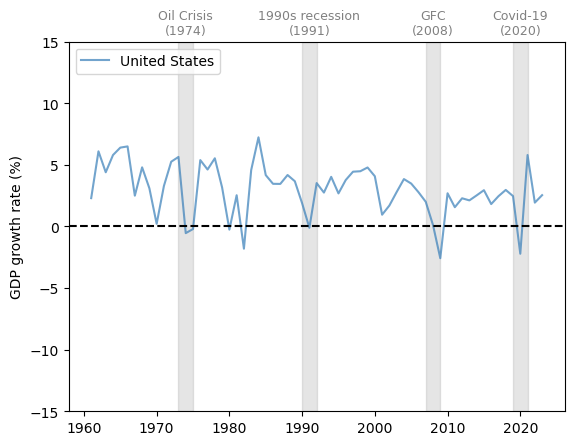

In [34]:
fig, ax = plt.subplots()

country = 'United States'
ylabel = 'GDP growth rate (%)'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Notice the very large dip during the Covid-19 pandemic.

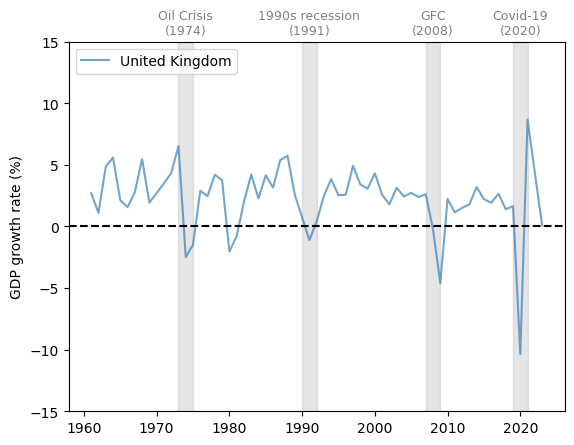

In [35]:
fig, ax = plt.subplots()

country = 'United Kingdom'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Now let’s consider Japan, which experienced rapid growth in the 1960s and 1970s, followed by slowed expansion in the past two decades.

Major dips in the growth rate coincided with the Oil Crisis of the 1970s, the Global Financial Crisis (GFC) and the Covid-19 pandemic.

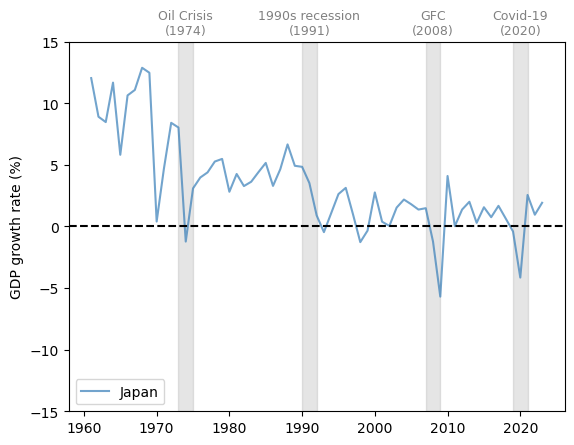

In [36]:
fig, ax = plt.subplots()

country = 'Japan'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Now let’s study Greece.

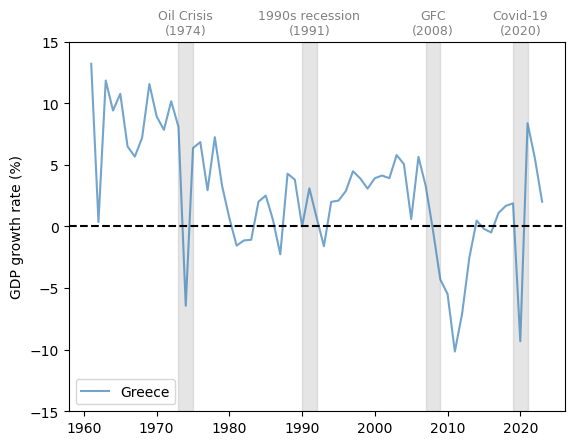

In [37]:
fig, ax = plt.subplots()

country = 'Greece'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

Greece experienced a very large drop in GDP growth around 2010-2011, during the peak of the Greek debt crisis.

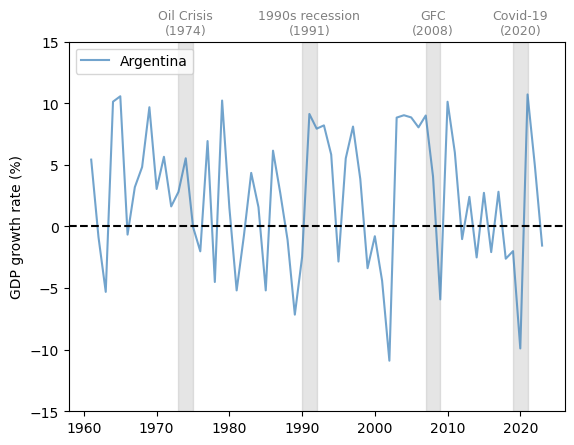

In [46]:
fig, ax = plt.subplots()

country = 'Argentina'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

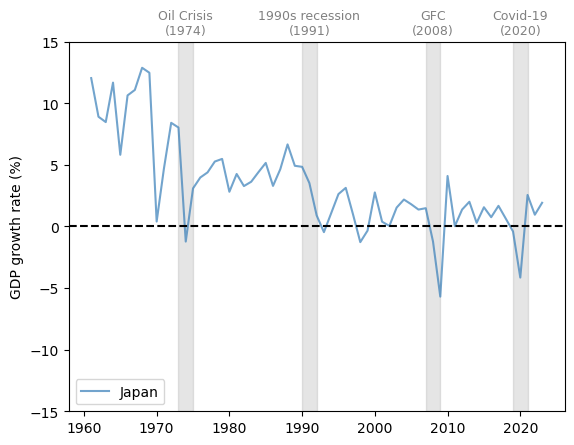

In [55]:
fig, ax = plt.subplots()

country = 'Japan'
plot_series(gdp_growth, country, 
            ylabel, 0.1, ax, 
            g_params, b_params, t_params)
plt.show()

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1.2;">Simulasi Model Solow</div></center>

In [76]:
# Simulasi Model Solow
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Parameter awal
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
xmin, xmax = 0, 3

def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k

def plot45(A, s, alpha, delta, kstar=None, title='Simulasi Model Solow'):
    xgrid = np.linspace(xmin, xmax, 12000)
    
    # Compute g values
    g_values = g(A, s, alpha, delta, xgrid)
    
    # Compute intersection
    if kstar is not None:
        y_intersection = g(A, s, alpha, delta, kstar)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(xmin, xmax)
    
    # Plot g(k) and 45-degree line
    ax.plot(xgrid, g_values, lw=2, alpha=0.6, color='blue', label=r'$g(k) = sAk^{\alpha} + (1 - \delta)k$')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')

    # Plot intersection
    if kstar is not None:
        ax.plot(kstar, kstar, 'go', ms=10, alpha=0.6, label='Steady State $k^*$')
        ax.annotate(r'$k^* = (sA / \delta)^{(1/(1-\alpha))}$',
                    xy=(kstar, kstar),
                    xycoords='data',
                    xytext=(-40, -60),
                    textcoords='offset points',
                    fontsize=14,
                    arrowprops=dict(arrowstyle="->", color='green'))

        # Add intersection lines
        # Horizontal line through (kstar, y_intersection)
        ax.axhline(y=y_intersection, color='purple', linestyle='--', linewidth=1, label='Horizontal Line at $k^*$')
        # Vertical line through (kstar, y_intersection)
        ax.axvline(x=kstar, color='orange', linestyle='--', linewidth=1, label='Vertical Line at $k^*$')
        
        # Lines connecting the intersection point to the function and 45-degree line
        ax.plot([kstar, kstar], [kstar, y_intersection], 'purple', linestyle='--', linewidth=1)
        ax.plot([0, kstar], [y_intersection, y_intersection], 'orange', linestyle='--', linewidth=1)

    # Set labels and title
    ax.set_title(title, fontsize=14)
    ax.legend(loc='upper left', frameon=False, fontsize=12)
    ax.set_xticks((0, 1, 2, 3))
    ax.set_yticks((0, 1, 2, 3))
    ax.set_xlabel('$k_t$', fontsize=12)
    ax.set_ylabel('$k_{t+1}$', fontsize=12)

    plt.show()

def interactive_plot45(A, s, alpha, delta, kstar):
    plot45(A, s, alpha, delta, kstar, title='S3 IE2024 Simulasi Model Solow')

# Create sliders for parameters and kstar
A_slider = widgets.FloatSlider(value=A, min=0.1, max=5.0, step=0.1, description='$A$', style={'description_width': 'initial'})
s_slider = widgets.FloatSlider(value=s, min=0, max=1, step=0.05, description='$s$', style={'description_width': 'initial'})
alpha_slider = widgets.FloatSlider(value=alpha, min=0, max=1, step=0.05, description='$\alpha$', style={'description_width': 'initial'})
delta_slider = widgets.FloatSlider(value=delta, min=0, max=1, step=0.05, description='$\delta$', style={'description_width': 'initial'})
kstar_slider = widgets.FloatSlider(value=(s * A / delta)**(1/(1-alpha)), min=0, max=3, step=0.1, description='$k^*$', style={'description_width': 'initial'})

# Link sliders to the interactive_plot45 function
interactive_plot = widgets.interactive(interactive_plot45, A=A_slider, s=s_slider, alpha=alpha_slider, delta=delta_slider, kstar=kstar_slider)

# Display the interactive widget
display(interactive_plot)


interactive(children=(FloatSlider(value=2.0, description='$A$', max=5.0, min=0.1, style=SliderStyle(descriptio…

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #d2ecf7; padding: 12px; line-height: 1;">OLG Model</div></center>

### https://juejung.github.io/jdocs/Comp/html/Slides_OLG_I.html

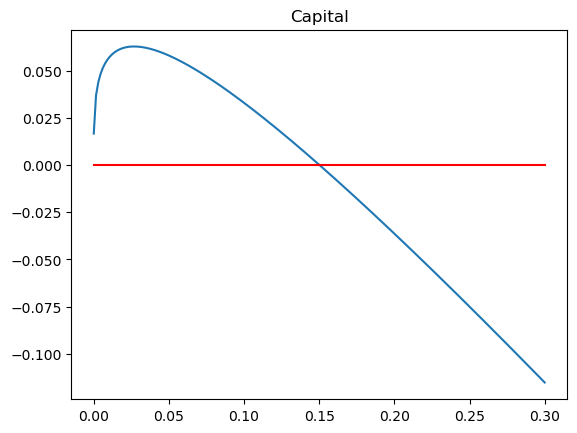

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy import stats as st
import time            # Imports system time module to time your script

plt.close('all')  # close all open figures

# -----------------------------------------------
# Root finding
# -----------------------------------------------

# Set parameter values
N_y     = 1.0
N_o     = 1.0
alpha   = 0.3
A       = 1
beta    = 0.9
delta   = 0.0
tau_L   = 0.2
tau_K   = 0.15
t_y     = 0.0
t_o     = 0.0
#
L       = 1

# -------------------------------------------------------------
# Method 1: Root finding
# -------------------------------------------------------------
# Find x so that f(x) = 0

# Define function of capital K so that func(K) = 0

def func(K):
    s = - K + N_y\
    *((beta*(1+(1-tau_K)*(alpha*A*K**(alpha-1) - delta))* \
    ((1-tau_L)*((1-alpha)*A*K**alpha) + t_y) - t_o) \
    /((1+beta)*(1. + (1-tau_K)*(alpha*A*K**(alpha-1) - delta))))

    return s

# Plot the function to see whether it has a root-point
Kmin = 0.0001
Kmax = 0.3

# Span grid with gridpoints between Kmin and Kmax
Kv = np.linspace(Kmin, Kmax, 200)

# Output vector prefilled with zeros
fKv = np.zeros(len(Kv),float) # define column vector

for i,K in enumerate(Kv):
    fKv[i] = func(K)

#print("fK=", fK)

fig, ax = plt.subplots()
ax.plot(Kv, fKv)
# Plot horizontal line at zero in red
ax.plot(Kv, np.zeros(len(Kv)), 'r')
ax.set_title('Capital')
plt.show()

Let us plot this function now for different values of capital K
 to see where the root of this function is:

## OLG Interaktif

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the function with dynamic parameters
def func(K, N_y, N_o, alpha, A, beta, delta, tau_L, tau_K, t_y, t_o):
    s = - K + N_y \
        * ((beta * (1 + (1 - tau_K) * (alpha * A * K**(alpha - 1) - delta)) * \
        ((1 - tau_L) * ((1 - alpha) * A * K**alpha) + t_y) - t_o) \
        / ((1 + beta) * (1. + (1 - tau_K) * (alpha * A * K**(alpha - 1) - delta))))
    return s

# Function to update the plot based on slider values
def update_plot(N_y, N_o, alpha, A, beta, delta, tau_L, tau_K, t_y, t_o):
    Kmin = 0.0001
    Kmax = 0.3
    Kv = np.linspace(Kmin, Kmax, 200)
    fKv = np.zeros(len(Kv), float)

    for i, K in enumerate(Kv):
        fKv[i] = func(K, N_y, N_o, alpha, A, beta, delta, tau_L, tau_K, t_y, t_o)

    fig, ax = plt.subplots()
    ax.plot(Kv, fKv)
    ax.plot(Kv, np.zeros(len(Kv)), 'r')
    ax.set_title('Capital')
    plt.xlabel('Capital (K)')
    plt.ylabel('Function Value')
    plt.grid(True)
    plt.show()

# Create sliders for interactive parameters
widgets.interact(
    update_plot,
    N_y=widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='N_y'),
    N_o=widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='N_o'),
    alpha=widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.05, description='alpha'),
    A=widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='A'),
    beta=widgets.FloatSlider(value=0.9, min=0.0, max=1.0, step=0.05, description='beta'),
    delta=widgets.FloatSlider(value=0.0, min=0.0, max=0.5, step=0.05, description='delta'),
    tau_L=widgets.FloatSlider(value=0.2, min=0.0, max=0.5, step=0.05, description='tau_L'),
    tau_K=widgets.FloatSlider(value=0.15, min=0.0, max=0.5, step=0.05, description='tau_K'),
    t_y=widgets.FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1, description='t_y'),
    t_o=widgets.FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.1, description='t_o')
)


interactive(children=(FloatSlider(value=1.0, description='N_y', max=5.0), FloatSlider(value=1.0, description='…

<function __main__.update_plot(N_y, N_o, alpha, A, beta, delta, tau_L, tau_K, t_y, t_o)>

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1;"> COBB-DOUGLASS Interaktif</div></center>

In [11]:
# Fungsi Produksi Cobb-Douglas
import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Fungsi untuk menghitung output berdasarkan fungsi Cobb-Douglas
def cobb_douglas(alpha=0.3, beta=0.7, A=2, K_max=10, L=5):
    K = np.linspace(1, K_max, 100)  # Modal dari 1 hingga K_max
    Y = A * K**alpha * L**beta

    # Plot hasil
    plt.figure(figsize=(10, 6))
    plt.plot(K, Y, label=f'Alpha={alpha}, Beta={beta}')
    plt.title('Fungsi Produksi Cobb-Douglas')
    plt.xlabel('Modal (K)')
    plt.ylabel('Output (Y)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Widget interaktif
interact(
    cobb_douglas,
    alpha=FloatSlider(min=0.1, max=1.0, step=0.05, value=0.3, description='Alpha'),
    beta=FloatSlider(min=0.1, max=1.0, step=0.05, value=0.7, description='Beta'),
    A=FloatSlider(min=0.1, max=5.0, step=0.1, value=2, description='A'),
    K_max=FloatSlider(min=1, max=20, step=1, value=10, description='Max Capital (K)'),
    L=FloatSlider(min=1, max=20, step=1, value=5, description='Labor (L)')
)


interactive(children=(FloatSlider(value=0.3, description='Alpha', max=1.0, min=0.1, step=0.05), FloatSlider(va…

<function __main__.cobb_douglas(alpha=0.3, beta=0.7, A=2, K_max=10, L=5)>

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1 ;"># Model ENDOGEN</div></center>

## <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #216e8f; color: #d2ecf7; padding: 12px; line-height: 0.8 ;">Simulasi Pertumbuhan Model Romer</div></center>

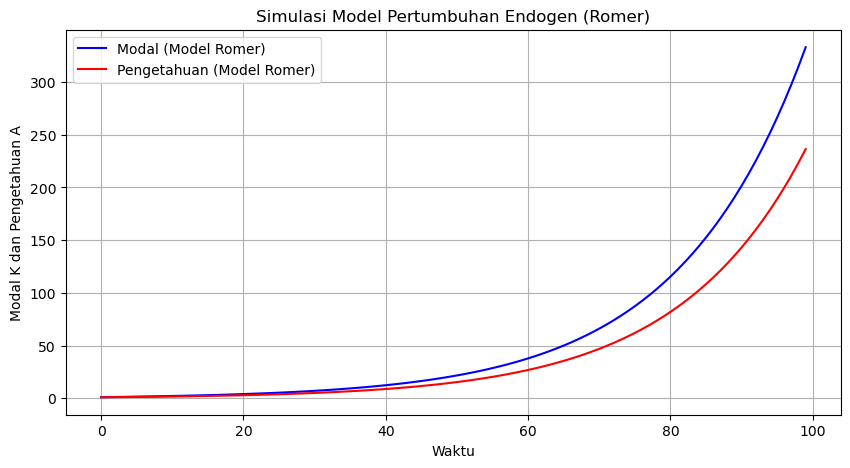

In [4]:
# Simulasi Pertumbuhan Model Romer
import numpy as np
import matplotlib.pyplot as plt

# Parameter
alpha = 0.3  # Elastisitas output terhadap modal
gamma = 0.05 # Pertumbuhan pengetahuan
beta = 0.4   # Elastisitas pengetahuan terhadap modal
delta = 0.1  # Tingkat depresiasi
K0 = 1       # Modal awal
A0 = 1       # Pengetahuan awal

# Waktu
T = 100

# Fungsi untuk simulasi
def romer_model(K0, A0, T):
    K = np.zeros(T)
    A = np.zeros(T)
    K[0] = K0
    A[0] = A0
    
    for t in range(1, T):
        Y = K[t-1]**alpha * A[t-1]**(1-alpha)
        dK_dt = s * Y - delta * K[t-1]
        dA_dt = gamma * (K[t-1]**beta) * (A[t-1]**(1-beta))
        
        K[t] = K[t-1] + dK_dt
        A[t] = A[t-1] + dA_dt
    
    return K, A

# Simulasi
K_romer, A_romer = romer_model(K0, A0, T)

# Grafik
plt.figure(figsize=(10, 5))
plt.plot(K_romer, label='Modal (Model Romer)', color='blue')
plt.plot(A_romer, label='Pengetahuan (Model Romer)', color='red')
plt.title('Simulasi Model Pertumbuhan Endogen (Romer)')
plt.xlabel('Waktu')
plt.ylabel('Modal K dan Pengetahuan A')
plt.legend()
plt.grid()
plt.show()


In [5]:
# Simulasi Pertumbuhan Model Romer
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk simulasi
def romer_model(K0, A0, T, alpha, gamma, beta, delta, s):
    K = np.zeros(T)
    A = np.zeros(T)
    K[0] = K0
    A[0] = A0
    
    for t in range(1, T):
        Y = K[t-1]**alpha * A[t-1]**(1-alpha)
        dK_dt = s * Y - delta * K[t-1]
        dA_dt = gamma * (K[t-1]**beta) * (A[t-1]**(1-beta))
        
        K[t] = K[t-1] + dK_dt
        A[t] = A[t-1] + dA_dt
    
    return K, A

# Fungsi untuk memperbarui grafik
def update_plot(alpha, gamma, beta, delta, s):
    K0 = 1  # Modal awal
    A0 = 1  # Pengetahuan awal
    T = 100  # Waktu
    K_romer, A_romer = romer_model(K0, A0, T, alpha, gamma, beta, delta, s)
    
    plt.figure(figsize=(10, 5))
    plt.plot(K_romer, label='Modal (Model Romer)', color='blue')
    plt.plot(A_romer, label='Pengetahuan (Model Romer)', color='red')
    plt.title('Simulasi Model Pertumbuhan Endogen (Romer)')
    plt.xlabel('Waktu')
    plt.ylabel('Modal K dan Pengetahuan A')
    plt.legend()
    plt.grid()
    plt.show()

# Slider untuk parameter
alpha_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='Alpha (Elastisitas Modal):')
gamma_slider = widgets.FloatSlider(value=0.05, min=0.0, max=0.1, step=0.01, description='Gamma (Pertumbuhan Pengetahuan):')
beta_slider = widgets.FloatSlider(value=0.4, min=0.0, max=1.0, step=0.01, description='Beta (Elastisitas Pengetahuan):')
delta_slider = widgets.FloatSlider(value=0.1, min=0.0, max=0.2, step=0.01, description='Delta (Tingkat Depresiasi):')
s_slider = widgets.FloatSlider(value=0.2, min=0.0, max=1.0, step=0.01, description='S (Tingkat Tabungan):')

# Menghubungkan slider dengan fungsi update_plot
ui = widgets.VBox([alpha_slider, gamma_slider, beta_slider, delta_slider, s_slider])
out = widgets.interactive_output(update_plot, 
                                  {'alpha': alpha_slider, 
                                   'gamma': gamma_slider, 
                                   'beta': beta_slider, 
                                   'delta': delta_slider, 
                                   's': s_slider})

# Menampilkan widget dan output
display(ui, out)


Output()

In [6]:
# Simulasi Pertumbuhan Model Romer
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk simulasi
def romer_model(K0, A0, T, alpha, gamma, beta, delta, s):
    K = np.zeros(T)
    A = np.zeros(T)
    K[0] = K0
    A[0] = A0
    
    for t in range(1, T):
        Y = K[t-1]**alpha * A[t-1]**(1-alpha)
        dK_dt = s * Y - delta * K[t-1]
        dA_dt = gamma * (K[t-1]**beta) * (A[t-1]**(1-beta))
        
        K[t] = K[t-1] + dK_dt
        A[t] = A[t-1] + dA_dt
    
    return K, A

# Fungsi untuk memperbarui grafik
def update_plot(alpha, gamma, beta, delta, s):
    K0 = 1  # Modal awal
    A0 = 1  # Pengetahuan awal
    T = 100  # Waktu
    K_romer, A_romer = romer_model(K0, A0, T, alpha, gamma, beta, delta, s)
    
    plt.figure(figsize=(10, 5))
    plt.plot(K_romer, label='Modal (Model Romer)', color='blue')
    plt.plot(A_romer, label='Pengetahuan (Model Romer)', color='red')
    plt.title('Simulasi Model Pertumbuhan Endogen (Romer)')
    plt.xlabel('Waktu')
    plt.ylabel('Modal K dan Pengetahuan A')
    plt.legend()
    plt.grid()
    plt.show()

# Slider untuk parameter dengan penambahan layout
slider_layout = widgets.Layout(width='300px', margin='0px 20px 20px 110px')  # Adjust width and margin

alpha_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, 
                                   description='Alpha (Elastisitas Modal):', layout=slider_layout)
gamma_slider = widgets.FloatSlider(value=0.05, min=0.0, max=0.1, step=0.01, 
                                   description='Gamma (Pertumbuhan Pengetahuan):', layout=slider_layout)
beta_slider = widgets.FloatSlider(value=0.4, min=0.0, max=1.0, step=0.01, 
                                  description='Beta (Elastisitas Pengetahuan):', layout=slider_layout)
delta_slider = widgets.FloatSlider(value=0.1, min=0.0, max=0.2, step=0.01, 
                                   description='Delta (Tingkat Depresiasi):', layout=slider_layout)
s_slider = widgets.FloatSlider(value=0.2, min=0.0, max=1.0, step=0.01, 
                               description='S (Tingkat Tabungan):', layout=slider_layout)

# Menghubungkan slider dengan fungsi update_plot
ui = widgets.VBox([alpha_slider, gamma_slider, beta_slider, delta_slider, s_slider])
out = widgets.interactive_output(update_plot, 
                                  {'alpha': alpha_slider, 
                                   'gamma': gamma_slider, 
                                   'beta': beta_slider, 
                                   'delta': delta_slider, 
                                   's': s_slider})

# Menampilkan widget dan output
display(ui, out)


Output()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk simulasi
def romer_model(K0, A0, T, alpha, gamma, beta, delta, s):
    K = np.zeros(T)
    A = np.zeros(T)
    K[0] = K0
    A[0] = A0
    
    for t in range(1, T):
        Y = K[t-1]**alpha * A[t-1]**(1-alpha)
        dK_dt = s * Y - delta * K[t-1]
        dA_dt = gamma * (K[t-1]**beta) * (A[t-1]**(1-beta))
        
        K[t] = K[t-1] + dK_dt
        A[t] = A[t-1] + dA_dt
    
    return K, A

# Fungsi untuk memperbarui grafik
def update_plot(alpha, gamma, beta, delta, s):
    K0 = 1  # Modal awal
    A0 = 1  # Pengetahuan awal
    T = 50  # Waktu
    K_romer, A_romer = romer_model(K0, A0, T, alpha, gamma, beta, delta, s)
    
    plt.figure(figsize=(10, 5))
    plt.plot(K_romer, label='Modal (Model Romer)', color='blue')
    plt.plot(A_romer, label='Pengetahuan (Model Romer)', color='red')
    plt.title('Simulasi Model Pertumbuhan Endogen (Romer)')
    plt.xlabel('Waktu')
    plt.ylabel('Modal K dan Pengetahuan A')
    plt.legend()
    plt.grid()
    plt.show()

# Slider untuk parameter dengan deskripsi di kanan
slider_layout = widgets.Layout(width='500px', margin='0 0 20px 0')
description_style = {'description_width': '300px', 'float': 'right'}

alpha_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, 
                                   description='Alpha (Elastisitas Modal):', 
                                   layout=slider_layout, 
                                   style=description_style)
gamma_slider = widgets.FloatSlider(value=0.05, min=0.0, max=0.1, step=0.01, 
                                   description='Gamma (Pertumbuhan Pengetahuan):', 
                                   layout=slider_layout, 
                                   style=description_style)
beta_slider = widgets.FloatSlider(value=0.4, min=0.0, max=1.0, step=0.01, 
                                  description='Beta (Elastisitas Pengetahuan):', 
                                  layout=slider_layout, 
                                  style=description_style)
delta_slider = widgets.FloatSlider(value=0.1, min=0.0, max=0.2, step=0.01, 
                                   description='Delta (Tingkat Depresiasi):', 
                                   layout=slider_layout, 
                                   style=description_style)
s_slider = widgets.FloatSlider(value=0.2, min=0.0, max=1.0, step=0.01, 
                               description='S (Tingkat Tabungan):', 
                               layout=slider_layout, 
                               style=description_style)

# Menghubungkan slider dengan fungsi update_plot
ui = widgets.VBox([alpha_slider, gamma_slider, beta_slider, delta_slider, s_slider])
out = widgets.interactive_output(update_plot, 
                                  {'alpha': alpha_slider, 
                                   'gamma': gamma_slider, 
                                   'beta': beta_slider, 
                                   'delta': delta_slider, 
                                   's': s_slider})

# Menampilkan widget dan output
display(ui, out)


Output()

## <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #216e8f; color: #d2ecf7; padding: 12px; line-height: 0.8 ;">Pertumbuhan Stok dan pertumbuhan pengetahuan</div></center>

In [63]:
# Pertumbuhan Stok dan pertumbuhan pengetahuan
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Fungsi untuk menghitung laju pertumbuhan pengetahuan
def knowledge_growth(theta, B, aK, aL, gamma, A_initial, K, L, time_steps):
    A = np.zeros(time_steps)
    A[0] = A_initial
    g_A = np.zeros(time_steps)

    for t in range(1, time_steps):
        g_A[t] = B * (A[t-1]**(theta - 1)) * (aK * K)**gamma * (aL * L)**(1 - gamma)
        A[t] = A[t-1] + g_A[t]

    return A, g_A

# Fungsi untuk plot hasil simulasi
def plot_knowledge_growth(theta=0.5, B=1, aK=0.2, aL=0.3, gamma=0.5, A_initial=1, K=100, L=100, time_steps=50):
    A, g_A = knowledge_growth(theta, B, aK, aL, gamma, A_initial, K, L, time_steps)

    time = np.arange(time_steps)
    
    # Plot stok pengetahuan (A)
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, A, label='Stock of Knowledge (A)', color='blue')
    plt.title('Stock of Knowledge over Time')
    plt.xlabel('Time')
    plt.ylabel('Knowledge (A)')
    plt.grid(True)
    plt.legend()

    # Plot laju pertumbuhan pengetahuan (g_A)
    plt.subplot(2, 1, 2)
    plt.plot(time, g_A, label='Growth Rate of Knowledge (g_A)', color='orange')
    plt.title('Growth Rate of Knowledge over Time')
    plt.xlabel('Time')
    plt.ylabel('Growth Rate (g_A)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Widget interaktif
interact(plot_knowledge_growth, 
         theta=FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='theta'),
         B=FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='B'),
         aK=FloatSlider(min=0.1, max=0.5, step=0.05, value=0.2, description='aK'),
         aL=FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='aL'),
         gamma=FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='gamma'),
         A_initial=FloatSlider(min=1, max=10, step=1, value=1, description='A_initial'),
         K=IntSlider(min=50, max=200, step=10, value=100, description='K'),
         L=IntSlider(min=50, max=200, step=10, value=100, description='L'),
         time_steps=IntSlider(min=10, max=100, step=10, value=50, description='time_steps'))


interactive(children=(FloatSlider(value=0.5, description='theta', max=1.0, min=0.1), FloatSlider(value=1.0, de…

<function __main__.plot_knowledge_growth(theta=0.5, B=1, aK=0.2, aL=0.3, gamma=0.5, A_initial=1, K=100, L=100, time_steps=50)>

In [65]:
# OK Pertumbuhan Stok dan pertumbuhan pengetahuan
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, HBox, VBox, Layout
import ipywidgets as widgets

# Fungsi untuk menghitung laju pertumbuhan pengetahuan
def knowledge_growth(theta, B, aK, aL, gamma, A_initial, K, L, time_steps):
    A = np.zeros(time_steps)
    A[0] = A_initial
    g_A = np.zeros(time_steps)

    for t in range(1, time_steps):
        g_A[t] = B * (A[t-1]**(theta - 1)) * (aK * K)**gamma * (aL * L)**(1 - gamma)
        A[t] = A[t-1] + g_A[t]

    return A, g_A

# Fungsi untuk plot hasil simulasi
def plot_knowledge_growth(theta=0.5, B=1, aK=0.2, aL=0.3, gamma=0.5, A_initial=1, K=100, L=100, time_steps=50):
    A, g_A = knowledge_growth(theta, B, aK, aL, gamma, A_initial, K, L, time_steps)

    time = np.arange(time_steps)
    
    # Plot stok pengetahuan (A)
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, A, label='Stock of Knowledge (A)', color='blue')
    plt.title('Stock of Knowledge over Time')
    plt.xlabel('Time')
    plt.ylabel('Knowledge (A)')
    plt.grid(True)
    plt.legend()

    # Plot laju pertumbuhan pengetahuan (g_A)
    plt.subplot(2, 1, 2)
    plt.plot(time, g_A, label='Growth Rate of Knowledge (g_A)', color='orange')
    plt.title('Growth Rate of Knowledge over Time')
    plt.xlabel('Time')
    plt.ylabel('Growth Rate (g_A)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Membuat slider dengan layout dan style untuk mengatur jarak deskripsi
theta_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='Theta (θ):', layout=Layout(width='300px'))
B_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='B:', layout=Layout(width='300px'))
aK_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.2, description='aK:', layout=Layout(width='300px'))
aL_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='aL:', layout=Layout(width='300px'))
gamma_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='Gamma:', layout=Layout(width='300px'))
A_initial_slider = FloatSlider(min=1, max=10, step=1, value=1, description='A_initial:', layout=Layout(width='300px'))
K_slider = IntSlider(min=50, max=200, step=10, value=100, description='K:', layout=Layout(width='300px'))
L_slider = IntSlider(min=50, max=200, step=10, value=100, description='L:', layout=Layout(width='300px'))
time_steps_slider = IntSlider(min=10, max=100, step=10, value=50, description='Time Steps:', layout=Layout(width='300px'))

# Mengatur posisi slider dalam dua kolom
slider_box_left = VBox([theta_slider, B_slider, aK_slider, gamma_slider, A_initial_slider], layout=Layout(margin='20px 20px 20px 20px'))
slider_box_right = VBox([aL_slider, K_slider, L_slider, time_steps_slider], layout=Layout(margin='20px 20px 20px 20px'))

# Menampilkan slider dan chart dalam satu layout
ui = HBox([slider_box_left, slider_box_right])

out = widgets.interactive_output(plot_knowledge_growth, {
    'theta': theta_slider,
    'B': B_slider,
    'aK': aK_slider,
    'aL': aL_slider,
    'gamma': gamma_slider,
    'A_initial': A_initial_slider,
    'K': K_slider,
    'L': L_slider,
    'time_steps': time_steps_slider
})

display(ui, out)


Output()

In [75]:
# OK Stok dan pertumbuhan pengetahuan (1 chart)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, HBox, VBox, Layout
import ipywidgets as widgets

# Fungsi untuk menghitung laju pertumbuhan pengetahuan
def knowledge_growth(theta, B, aK, aL, gamma, A_initial, K, L, time_steps):
    A = np.zeros(time_steps)
    A[0] = A_initial
    g_A = np.zeros(time_steps)

    for t in range(1, time_steps):
        g_A[t] = B * (A[t-1]**(theta - 1)) * (aK * K)**gamma * (aL * L)**(1 - gamma)
        A[t] = A[t-1] + g_A[t]

    return A, g_A

# Fungsi untuk plot hasil simulasi
def plot_knowledge_growth(theta=0.5, B=1, aK=0.2, aL=0.3, gamma=0.5, A_initial=1, K=100, L=100, time_steps=50):
    A, g_A = knowledge_growth(theta, B, aK, aL, gamma, A_initial, K, L, time_steps)

    time = np.arange(time_steps)

    # Plot stok pengetahuan dan laju pertumbuhan dalam satu chart
    plt.figure(figsize=(8, 5))
    plt.plot(time, A, label='Stock of Knowledge (A)', color='blue', linewidth=2)
    plt.plot(time, g_A, label='Growth Rate of Knowledge (g_A)', color='orange', linestyle='--', linewidth=2)
    plt.title('Knowledge Stock and Growth Rate over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Membuat slider dengan layout dan style untuk mengatur jarak deskripsi
theta_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='Theta (θ):', layout=Layout(width='300px'))
B_slider = FloatSlider(min=0.1, max=2.0, step=0.1, value=1, description='B:', layout=Layout(width='300px'))
aK_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.2, description='aK:', layout=Layout(width='300px'))
aL_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='aL:', layout=Layout(width='300px'))
gamma_slider = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5, description='Gamma:', layout=Layout(width='300px'))
A_initial_slider = FloatSlider(min=1, max=10, step=1, value=1, description='A_initial:', layout=Layout(width='300px'))
K_slider = IntSlider(min=50, max=200, step=10, value=100, description='K:', layout=Layout(width='300px'))
L_slider = IntSlider(min=50, max=200, step=10, value=100, description='L:', layout=Layout(width='300px'))
time_steps_slider = IntSlider(min=10, max=100, step=10, value=50, description='Time Steps:', layout=Layout(width='300px'))

# Mengatur posisi slider dalam dua kolom
slider_box_left = VBox([theta_slider, B_slider, aK_slider, gamma_slider, A_initial_slider], layout=Layout(margin='20px 20px 20px 20px'))
slider_box_right = VBox([aL_slider, K_slider, L_slider, time_steps_slider], layout=Layout(margin='20px 20px 20px 20px'))

# Menampilkan slider dan chart dalam satu layout
ui = HBox([slider_box_left, slider_box_right])

out = widgets.interactive_output(plot_knowledge_growth, {
    'theta': theta_slider,
    'B': B_slider,
    'aK': aK_slider,
    'aL': aL_slider,
    'gamma': gamma_slider,
    'A_initial': A_initial_slider,
    'K': K_slider,
    'L': L_slider,
    'time_steps': time_steps_slider
})

display(ui, out)


Output()

## <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #216e8f; color: #d2ecf7; padding: 12px; line-height: 0.8 ;">The level and growth rate of population</div></center>

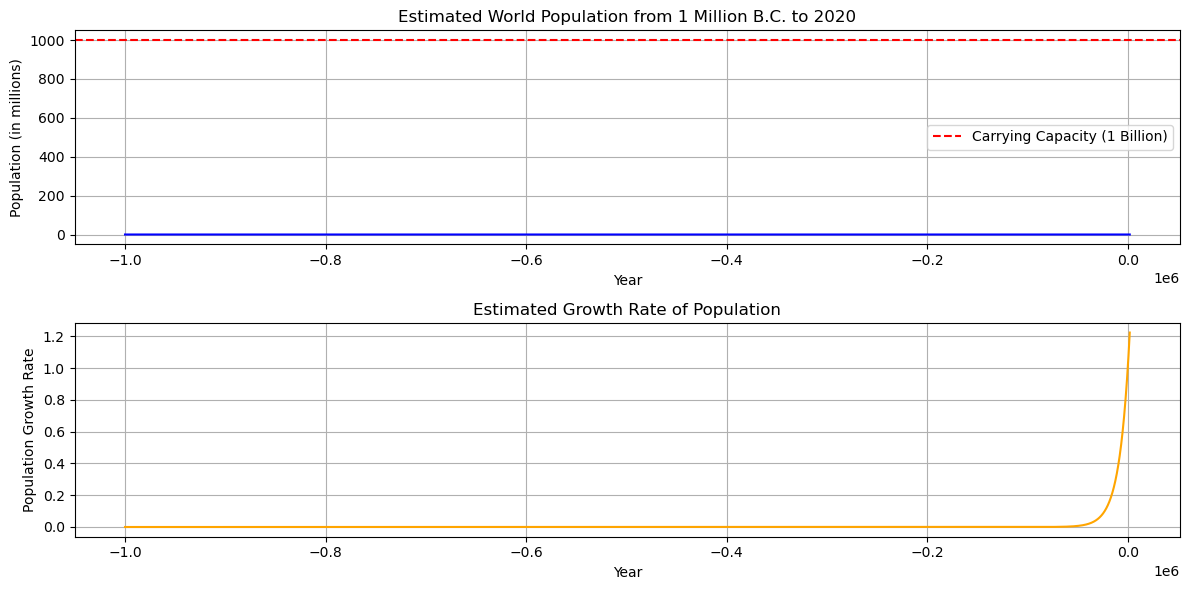

In [3]:
# The level and growth rate of population
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters for the logistic growth model
initial_population = 1e4  # Initial population (e.g., 10,000)
carrying_capacity = 1e9   # Estimated carrying capacity (e.g., 1 billion)
growth_rate = 0.0001      # Growth rate per year

# Time from 1 million B.C. to 2020
years = np.arange(-1000000, 2021, 1)  # From 1 million B.C. (negative values) to 2020

# Logistic growth model
def logistic_growth(t, P0, K, r):
    return K / (1 + ((K / P0 - 1) * np.exp(-r * t)))

# Calculate population over time
population = logistic_growth(years, initial_population, carrying_capacity, growth_rate)

# Calculate growth rate as the change in population over time
growth_rate_population = np.diff(population, prepend=population[0])

# Prepare data for visualization
data = pd.DataFrame({
    'Year': years,
    'Population': population,
    'Growth Rate': growth_rate_population
})

# Plotting
plt.figure(figsize=(12, 6))

# Population plot
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['Population'] / 1e6, color='blue')
plt.title('Estimated World Population from 1 Million B.C. to 2020')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.grid()
plt.axhline(y=carrying_capacity / 1e6, color='red', linestyle='--', label='Carrying Capacity (1 Billion)')
plt.legend()

# Growth rate plot
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Growth Rate'], color='orange')
plt.title('Estimated Growth Rate of Population')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate')
plt.grid()

plt.tight_layout()
plt.show()


## <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #216e8f; color: #d2ecf7; padding: 12px; line-height: 0.8 ;">The dynamics growth rates of capital and knowledge when β+θ</div></center>

In [64]:
# Dinamika laju pertumbuhan modal (capital growth) dan pengetahuan (knowledge growth) 𝛽 + 𝜃 < 1 (4 grafik)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, HBox, VBox, Layout
import ipywidgets as widgets

# Fungsi untuk menghitung pertumbuhan modal dan pengetahuan
def growth_simulation(beta, theta, alpha_K, alpha_A, K_initial, A_initial, time_steps):
    assert beta + theta < 1, "Kondisi beta + theta harus < 1"

    K = np.zeros(time_steps)  # Array untuk modal
    A = np.zeros(time_steps)  # Array untuk pengetahuan
    g_K = np.zeros(time_steps)  # Laju pertumbuhan modal
    g_A = np.zeros(time_steps)  # Laju pertumbuhan pengetahuan

    K[0] = K_initial  # Nilai awal modal
    A[0] = A_initial  # Nilai awal pengetahuan

    for t in range(1, time_steps):
        # Laju pertumbuhan modal dan pengetahuan
        g_K[t] = alpha_K * (K[t-1]**beta) * (A[t-1]**(1 - beta))
        g_A[t] = alpha_A * (K[t-1]**theta) * (A[t-1]**(1 - theta))

        # Update nilai modal dan pengetahuan
        K[t] = K[t-1] + g_K[t]
        A[t] = A[t-1] + g_A[t]

    return K, A, g_K, g_A

# Fungsi untuk memplot hasil simulasi
def plot_growth(beta=0.3, theta=0.5, alpha_K=0.1, alpha_A=0.1, K_initial=100, A_initial=100, time_steps=50):
    assert beta + theta < 1, "Kondisi beta + theta harus < 1"
    
    K, A, g_K, g_A = growth_simulation(beta, theta, alpha_K, alpha_A, K_initial, A_initial, time_steps)

    time = np.arange(time_steps)

    # Plot modal dan pengetahuan
    plt.figure(figsize=(10, 7))    # (12,8)

    # Plot stok modal (K)
    plt.subplot(2, 2, 1)
    plt.plot(time, K, label='Capital Stock (K)', color='blue')
    plt.title('Capital Stock over Time')
    plt.xlabel('Time')
    plt.ylabel('Capital (K)')
    plt.grid(True)
    plt.legend()

    # Plot stok pengetahuan (A)
    plt.subplot(2, 2, 2)
    plt.plot(time, A, label='Knowledge Stock (A)', color='green')
    plt.title('Knowledge Stock over Time')
    plt.xlabel('Time')
    plt.ylabel('Knowledge (A)')
    plt.grid(True)
    plt.legend()

    # Plot laju pertumbuhan modal (g_K)
    plt.subplot(2, 2, 3)
    plt.plot(time, g_K, label='Growth Rate of Capital (g_K)', color='orange')
    plt.title('Growth Rate of Capital over Time')
    plt.xlabel('Time')
    plt.ylabel('Growth Rate (g_K)')
    plt.grid(True)
    plt.legend()

    # Plot laju pertumbuhan pengetahuan (g_A)
    plt.subplot(2, 2, 4)
    plt.plot(time, g_A, label='Growth Rate of Knowledge (g_A)', color='red')
    plt.title('Growth Rate of Knowledge over Time')
    plt.xlabel('Time')
    plt.ylabel('Growth Rate (g_A)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Membuat slider dengan layout dan style untuk mengatur jarak deskripsi
beta_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='Beta (β):', layout=Layout(width='300px'))
theta_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.5, description='Theta (θ):', layout=Layout(width='300px'))
alpha_K_slider = FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description='Alpha K:', layout=Layout(width='300px'))
alpha_A_slider = FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description='Alpha A:', layout=Layout(width='300px'))
K_initial_slider = IntSlider(min=50, max=500, step=10, value=100, description='Initial K:', layout=Layout(width='300px'))
A_initial_slider = IntSlider(min=50, max=500, step=10, value=100, description='Initial A:', layout=Layout(width='300px'))
time_steps_slider = IntSlider(min=5, max=100, step=10, value=50, description='Time Steps:', layout=Layout(width='300px'))

# Mengatur posisi slider dalam dua kolom
slider_box_left = VBox([beta_slider, theta_slider, alpha_K_slider], layout=Layout(margin='20px 20px 20px 20px'))
slider_box_right = VBox([alpha_A_slider, K_initial_slider, A_initial_slider, time_steps_slider], layout=Layout(margin='20px 20px 20px 20px'))

# Menampilkan slider dan chart dalam satu layout
ui = HBox([slider_box_left, slider_box_right])

out = widgets.interactive_output(plot_growth, {
    'beta': beta_slider,
    'theta': theta_slider,
    'alpha_K': alpha_K_slider,
    'alpha_A': alpha_A_slider,
    'K_initial': K_initial_slider,
    'A_initial': A_initial_slider,
    'time_steps': time_steps_slider
})

display(ui, out)


Output()

In [49]:
# Dinamika capital growth) dan knowledge growth dalam kondisi di mana 𝛽 + 𝜃 < 1
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, HBox, VBox, Layout
import ipywidgets as widgets

# Fungsi untuk menghitung pertumbuhan modal dan pengetahuan
def growth_simulation(beta, theta, alpha_K, alpha_A, K_initial, A_initial, time_steps):
    assert beta + theta < 1, "Kondisi beta + theta harus < 1"

    K = np.zeros(time_steps)  # Array untuk modal
    A = np.zeros(time_steps)  # Array untuk pengetahuan
    g_K = np.zeros(time_steps)  # Laju pertumbuhan modal
    g_A = np.zeros(time_steps)  # Laju pertumbuhan pengetahuan

    K[0] = K_initial  # Nilai awal modal
    A[0] = A_initial  # Nilai awal pengetahuan

    for t in range(1, time_steps):
        # Laju pertumbuhan modal dan pengetahuan
        g_K[t] = alpha_K * (K[t-1]**beta) * (A[t-1]**(1 - beta))
        g_A[t] = alpha_A * (K[t-1]**theta) * (A[t-1]**(1 - theta))

        # Update nilai modal dan pengetahuan
        K[t] = K[t-1] + g_K[t]
        A[t] = A[t-1] + g_A[t]

    return K, A, g_K, g_A

# Fungsi untuk memplot hasil simulasi
def plot_growth(beta=0.3, theta=0.5, alpha_K=0.1, alpha_A=0.1, K_initial=100, A_initial=100, time_steps=50):
    assert beta + theta < 1, "Kondisi beta + theta harus < 1"
    
    K, A, g_K, g_A = growth_simulation(beta, theta, alpha_K, alpha_A, K_initial, A_initial, time_steps)

    time = np.arange(time_steps)

    # Plot modal dan pengetahuan dalam satu chart
    plt.figure(figsize=(9, 5))

    # Plot stok modal (K), pengetahuan (A), laju pertumbuhan modal (g_K), dan pengetahuan (g_A)
    plt.plot(time, K, label='Capital Stock (K)', color='blue')
    plt.plot(time, A, label='Knowledge Stock (A)', color='green')
    plt.plot(time, g_K, label='Growth Rate of Capital (g_K)', color='orange', linestyle='--')
    plt.plot(time, g_A, label='Growth Rate of Knowledge (g_A)', color='red', linestyle='--')

    plt.title('Growth Dynamics of Capital, Knowledge, and Growth Rates')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Widget interaktif untuk mengontrol parameter simulasi
beta_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='Beta (β):', layout=Layout(width='400px'))
theta_slider = FloatSlider(min=0.1, max=0.5, step=0.05, value=0.5, description='Theta (θ):', layout=Layout(width='400px'))
alpha_K_slider = FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description='Alpha K:', layout=Layout(width='400px'))
alpha_A_slider = FloatSlider(min=0.01, max=0.2, step=0.01, value=0.1, description='Alpha A:', layout=Layout(width='400px'))
K_initial_slider = IntSlider(min=50, max=500, step=10, value=100, description='Initial K:', layout=Layout(width='400px'))
A_initial_slider = IntSlider(min=50, max=500, step=10, value=100, description='Initial A:', layout=Layout(width='400px'))
time_steps_slider = IntSlider(min=5, max=100, step=10, value=50, description='Time Steps:', layout=Layout(width='400px'))

# Layout slider dalam dua kolom
slider_box_left = VBox([beta_slider, theta_slider, alpha_K_slider], layout=Layout(margin='10px 10px 10px 10px'))
slider_box_right = VBox([alpha_A_slider, K_initial_slider, A_initial_slider, time_steps_slider], layout=Layout(margin='10px 10px 10px 10px'))

# Menampilkan slider dan chart dalam satu layout
ui = HBox([slider_box_left, slider_box_right])

out = widgets.interactive_output(plot_growth, {
    'beta': beta_slider,
    'theta': theta_slider,
    'alpha_K': alpha_K_slider,
    'alpha_A': alpha_A_slider,
    'K_initial': K_initial_slider,
    'A_initial': A_initial_slider,
    'time_steps': time_steps_slider
})

display(ui, out)


Output()

### Contoh menghitung elastisitas pengetahuan terhadap output

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Contoh data (Anda harus menggantinya dengan data empiris yang relevan)
data = {
    'Output': [1000, 1200, 1500, 1800, 2100],
    'Capital': [100, 120, 150, 180, 210],
    'Labor': [50, 60, 70, 80, 90],
    'Knowledge': [10, 12, 15, 18, 21]
}
df = pd.DataFrame(data)

# Transformasi logaritma
df['ln_Output'] = np.log(df['Output'])
df['ln_Capital'] = np.log(df['Capital'])
df['ln_Labor'] = np.log(df['Labor'])
df['ln_Knowledge'] = np.log(df['Knowledge'])

# Model regresi
X = df[['ln_Capital', 'ln_Labor', 'ln_Knowledge']]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = df['ln_Output']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              ln_Output   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.968e+24
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.68e-25
Time:                        22:09:53   Log-Likelihood:                 142.12
No. Observations:                   5   AIC:                            -278.2
Df Residuals:                       2   BIC:                            -279.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9460      2e-12   4.74e+11   

/Users/ay/opt/anaconda3/envs/PY39/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #216e8f; color: #d2ecf7; padding: 12px; line-height: 0.8 ;">The dynamics growth rates of capital and knowledge when β+θ</div></center>

/var/folders/ph/h52724vj7sj4x8hrh5p92bcr0000gp/T/ipykernel_34628/2963871285.py:22: RuntimeWarning: overflow encountered in scalar multiply
  A[t] = A[t-1] + delta * A[t-1] * R[t-1]


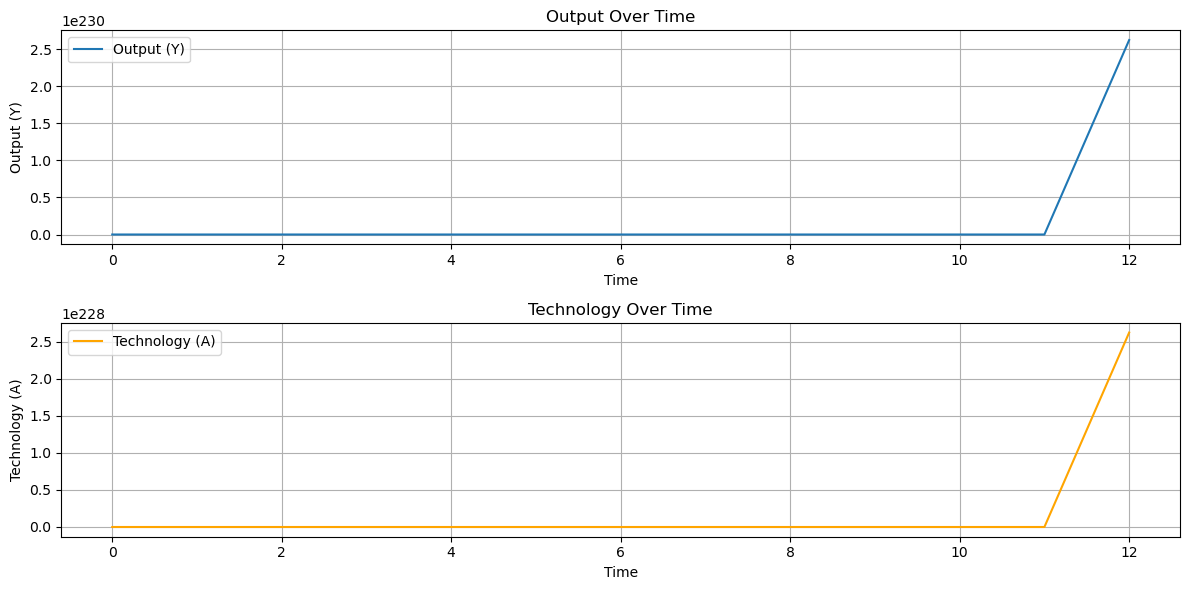

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
alpha = 0.3
delta = 0.1
eta = 0.15
K = 100  # Modal tetap
L = 100  # Tenaga kerja tetap
time_steps = 50

# Inisialisasi
A = np.zeros(time_steps)
Y = np.zeros(time_steps)
R = np.zeros(time_steps)
A[0] = 1  # Teknologi awal
Y[0] = A[0] * K**alpha * L**(1-alpha)

# Simulasi
for t in range(1, time_steps):
    R[t-1] = eta * 0.3 * Y[t-1]
    A[t] = A[t-1] + delta * A[t-1] * R[t-1]
    Y[t] = A[t] * K**alpha * L**(1-alpha)

# Plot hasil
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(Y, label='Output (Y)')
plt.title('Output Over Time')
plt.xlabel('Time')
plt.ylabel('Output (Y)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(A, label='Technology (A)', color='orange')
plt.title('Technology Over Time')
plt.xlabel('Time')
plt.ylabel('Technology (A)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Fungsi untuk menghitung output dan teknologi
def romer_model(alpha=0.3, delta=0.1, eta=0.15, K=100, L=100, time_steps=50):
    # Inisialisasi
    A = np.zeros(time_steps)
    Y = np.zeros(time_steps)
    R = np.zeros(time_steps)
    A[0] = 1  # Teknologi awal
    Y[0] = A[0] * K**alpha * L**(1-alpha)

    # Simulasi
    for t in range(1, time_steps):
        R[t-1] = eta * 0.3 * Y[t-1]
        A[t] = A[t-1] + delta * A[t-1] * R[t-1]
        Y[t] = A[t] * K**alpha * L**(1-alpha)

    # Plot hasil
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(Y, label='Output (Y)')
    plt.title('Output Over Time')
    plt.xlabel('Time')
    plt.ylabel('Output (Y)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(A, label='Technology (A)', color='orange')
    plt.title('Technology Over Time')
    plt.xlabel('Time')
    plt.ylabel('Technology (A)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Widget interaktif
interact(
    romer_model,
    alpha=FloatSlider(min=0.1, max=0.5, step=0.05, value=0.3, description='Alpha'),
    delta=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='Delta'),
    eta=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.15, description='Eta'),
    K=FloatSlider(min=50, max=200, step=10, value=100, description='Capital (K)'),
    L=FloatSlider(min=50, max=200, step=10, value=100, description='Labor (L)'),
    time_steps=IntSlider(min=10, max=100, step=10, value=50, description='Time Steps')
)


interactive(children=(FloatSlider(value=0.3, description='Alpha', max=0.5, min=0.1, step=0.05), FloatSlider(va…

<function __main__.romer_model(alpha=0.3, delta=0.1, eta=0.15, K=100, L=100, time_steps=50)>

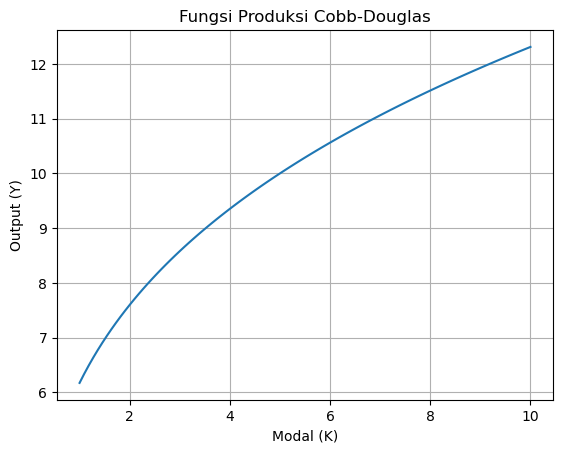

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A = 2
alpha = 0.3
beta = 0.7
K = np.linspace(1, 10, 100)  # Modal
L = 5  # Tenaga kerja tetap

# Fungsi produksi Cobb-Douglas
Y = A * K**alpha * L**beta

plt.plot(K, Y)
plt.title('Fungsi Produksi Cobb-Douglas')
plt.xlabel('Modal (K)')
plt.ylabel('Output (Y)')
plt.grid(True)
plt.show()


# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #d2ecf7; padding: 12px; line-height: 1;">SIMULASI MODEL ENDOGEN</div></center>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to run the simulation
def simulate_model(alpha, beta, delta, n, time_steps=100):
    A0 = 1       # Initial level of knowledge
    K0 = 1       # Initial level of capital
    L0 = 100     # Initial labor force

    # Initialize arrays
    A = np.zeros(time_steps)
    K = np.zeros(time_steps)
    Y = np.zeros(time_steps)
    A[0] = A0
    K[0] = K0

    # Simulation loop
    for t in range(1, time_steps):
        # Output production function
        Y[t-1] = K[t-1]**alpha * A[t-1]**beta * L0**(1-alpha-beta)

        # Update capital and knowledge
        K[t] = (1 - delta) * K[t-1] + Y[t-1]  # Capital accumulation
        A[t] = A[t-1] + K[t-1]**alpha * L0**(1-alpha-beta)  # Knowledge accumulation

    # Final output production
    Y[-1] = K[-1]**alpha * A[-1]**beta * L0**(1-alpha-beta)

    # Plotting results
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(A, label='Knowledge (A)', color='blue')
    plt.title('Knowledge Accumulation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Knowledge (A)')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(K, label='Capital (K)', color='green')
    plt.title('Capital Accumulation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Capital (K)')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(Y, label='Output (Y)', color='orange')
    plt.title('Output Production Over Time')
    plt.xlabel('Time')
    plt.ylabel('Output (Y)')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create interactive widgets
alpha_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Alpha (α):')
beta_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Beta (β):')
delta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Delta (δ):')
n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='Population Growth (n):')

# Create interactive output

ui = widgets.VBox([alpha_slider, beta_slider, delta_slider, n_slider])
out = widgets.interactive_output(simulate_model, {
    'alpha': alpha_slider,
    'beta': beta_slider,
    'delta': delta_slider,
    'n': n_slider
})

# Display the widgets and output
display(ui, out)


Output()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk mensimulasikan model pertumbuhan endogen
def simulate_growth_model(alpha, beta, theta, delta, n, time_steps=100):
    # Inisialisasi parameter awal
    A0 = 1       # Level pengetahuan awal
    K0 = 1       # Level modal awal
    L0 = 100     # Jumlah tenaga kerja awal

    # Inisialisasi array untuk menyimpan nilai
    A = np.zeros(time_steps)
    K = np.zeros(time_steps)
    Y = np.zeros(time_steps)
    A[0] = A0
    K[0] = K0

    # Simulasi model
    for t in range(1, time_steps):
        # Fungsi produksi output
        Y[t-1] = K[t-1]**alpha * A[t-1]**beta * L0**(1-alpha-beta)

        # Pembaruan modal dan pengetahuan
        K[t] = (1 - delta) * K[t-1] + Y[t-1]  # Akumulasi modal
        A[t] = A[t-1] + (K[t-1]**theta)  # Akumulasi pengetahuan

    # Plot hasil
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(A, label='Knowledge (A)', color='blue')
    plt.title('Knowledge Accumulation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Knowledge (A)')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(K, label='Capital (K)', color='green')
    plt.title('Capital Accumulation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Capital (K)')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(Y, label='Output (Y)', color='orange')
    plt.title('Output Production Over Time')
    plt.xlabel('Time')
    plt.ylabel('Output (Y)')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Membuat widget interaktif
alpha_slider = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description='Alpha (α):')
beta_slider = widgets.FloatSlider(value=0.4, min=0, max=1, step=0.01, description='Beta (β):')
theta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Theta (θ):')
delta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Delta (δ):')
n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='Population Growth (n):')

# Membuat output interaktif
ui = widgets.VBox([alpha_slider, beta_slider, theta_slider, delta_slider, n_slider])
out = widgets.interactive_output(simulate_growth_model, {
    'alpha': alpha_slider,
    'beta': beta_slider,
    'theta': theta_slider,
    'delta': delta_slider,
    'n': n_slider
})

# Menampilkan widget dan output
display(ui, out)


Output()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Fungsi untuk mensimulasikan model pertumbuhan endogen
def simulate_growth_model(alpha, beta, theta, delta, n, time_steps=100):
    # Inisialisasi parameter awal
    A0 = 1       # Level pengetahuan awal
    K0 = 1       # Level modal awal
    L0 = 100     # Jumlah tenaga kerja awal

    # Inisialisasi array untuk menyimpan nilai
    A = np.zeros(time_steps)
    K = np.zeros(time_steps)
    Y = np.zeros(time_steps)
    A[0] = A0
    K[0] = K0

    # Simulasi model
    for t in range(1, time_steps):
        # Fungsi produksi output
        Y[t-1] = K[t-1]**alpha * A[t-1]**beta * L0**(1-alpha-beta)

        # Pembaruan modal dan pengetahuan
        K[t] = (1 - delta) * K[t-1] + Y[t-1]  # Akumulasi modal
        A[t] = A[t-1] + (K[t-1]**theta)  # Akumulasi pengetahuan

    # Plot hasil
    plt.figure(figsize=(12, 6))
    
    # Mengatur plot untuk menampilkan K, A, dan Y dalam satu kurva
    plt.plot(A, label='Knowledge (A)', color='blue')
    plt.plot(K, label='Capital (K)', color='green')
    plt.plot(Y, label='Output (Y)', color='orange')

    # Menemukan titik perpotongan antara K dan A
    intersection_index = np.argwhere(np.isclose(A, K, atol=1e-2)).flatten()
    if intersection_index.size > 0:
        intersection_point = intersection_index[0]
        plt.plot(intersection_point, A[intersection_point], 'ro', label='Intersection Point (K=A)')
        plt.annotate(f'({intersection_point}, {A[intersection_point]:.2f})', 
                     (intersection_point, A[intersection_point]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', color='red')

    plt.title('Growth Dynamics of Knowledge, Capital, and Output Over Time')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Membuat widget interaktif
alpha_slider = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description='Alpha (α):')
beta_slider = widgets.FloatSlider(value=0.4, min=0, max=1, step=0.01, description='Beta (β):')
theta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Theta (θ):')
delta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Delta (δ):')
n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='Population Growth (n):')

# Membuat output interaktif

ui = widgets.VBox([alpha_slider, beta_slider, theta_slider, delta_slider, n_slider])
out = widgets.interactive_output(simulate_growth_model, {
    'alpha': alpha_slider,
    'beta': beta_slider,
    'theta': theta_slider,
    'delta': delta_slider,
    'n': n_slider
})

# Menampilkan widget dan output
display(ui, out)


Output()

## Simulasi Model Pertumbuhan Endogen

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Layout

# Fungsi untuk mensimulasikan model pertumbuhan endogen
def simulate_growth_model(alpha, beta, theta, delta, n, time_steps=100):
    # Inisialisasi parameter awal
    A0 = 1       # Level pengetahuan awal
    K0 = 1       # Level modal awal
    L0 = 100     # Jumlah tenaga kerja awal

    # Inisialisasi array untuk menyimpan nilai
    A = np.zeros(time_steps)
    K = np.zeros(time_steps)
    Y = np.zeros(time_steps)
    A[0] = A0
    K[0] = K0

    # Simulasi model
    for t in range(1, time_steps):
        # Fungsi produksi output
        Y[t-1] = K[t-1]**alpha * A[t-1]**beta * L0**(1-alpha-beta)

        # Pembaruan modal dan pengetahuan
        K[t] = (1 - delta) * K[t-1] + Y[t-1]  # Akumulasi modal
        A[t] = A[t-1] + (K[t-1]**theta)  # Akumulasi pengetahuan

    # Plot hasil
    plt.figure(figsize=(12, 6))
    
    # Mengatur plot untuk menampilkan K, A, dan Y dalam satu kurva
    plt.plot(A, label='Knowledge (A)', color='blue')
    plt.plot(K, label='Capital (K)', color='green')
    plt.plot(Y, label='Output (Y)', color='orange')

    # Menemukan titik perpotongan antara K dan A
    intersection_index = np.argwhere(np.isclose(A, K, atol=1e-2)).flatten()
    if intersection_index.size > 0:
        intersection_point = intersection_index[0]
        plt.plot(intersection_point, A[intersection_point], 'ro', label='Intersection Point (K=A)')
        plt.annotate(f'({intersection_point}, {A[intersection_point]:.2f})', 
                     (intersection_point, A[intersection_point]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', color='red')

    plt.title('Growth Dynamics of Knowledge, Capital, and Output Over Time')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Membuat slider dengan layout dan style untuk mengatur jarak deskripsi
alpha_slider = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, 
                                   description='Alpha (α):', 
                                   layout=Layout(width='400px'), 
                                   style={'description_width': '150px'})

beta_slider = widgets.FloatSlider(value=0.4, min=0, max=1, step=0.01, 
                                  description='Beta (β):', 
                                  layout=Layout(width='400px'),
                                  style={'description_width': '150px'})

theta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, 
                                   description='Theta (θ):', 
                                   layout=Layout(width='400px'),
                                   style={'description_width': '150px'})

delta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, 
                                   description='Delta (δ):', 
                                   layout=Layout(width='400px'),
                                   style={'description_width': '150px'})

n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, 
                               description='Pop. Growth (n):', 
                               layout=Layout(width='400px'),
                               style={'description_width': '150px'})

# Mengatur posisi slider dalam dua kolom
slider_box_left = widgets.VBox([alpha_slider, beta_slider])
slider_box_right = widgets.VBox([theta_slider, delta_slider, n_slider])

# Menempatkan slider dalam dua kolom berdampingan dengan layout
ui = widgets.HBox([slider_box_left, slider_box_right])

# Membuat output interaktif
out = widgets.interactive_output(simulate_growth_model, {
    'alpha': alpha_slider,
    'beta': beta_slider,
    'theta': theta_slider,
    'delta': delta_slider,
    'n': n_slider
})

# Menampilkan widget dan output
display(ui, out)


Output()

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #000000; color: #00DDDE; padding: 12px; line-height: 1.2;">Model the dynamics of capital and knowledge</div></center>

In [2]:
# Model the dynamics of capital and knowledge
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Parameters
delta_k = 0.05  # Depreciation rate of capital
delta_A = 0.05  # Efficiency of R&D for knowledge accumulation
alpha = 0.8     # Diminishing returns to knowledge accumulation
s = 0.2         # Savings rate
L = 500         # Total labor in the economy
K0 = 10         # Initial capital stock
A0 = 1          # Initial knowledge stock
T = 50         # Time period

# Time array
time = np.linspace(0, T, 1000)

# Function to compute dK/dt (change in capital over time)
def dK_dt(K, Y, s, delta_k):
    return s * Y - delta_k * K

# Function to compute dA/dt (change in knowledge over time)
def dA_dt(A, delta_A, alpha, L_A):
    return delta_A * A**alpha * L_A

# Function to compute dynamics for capital and knowledge over time
def simulate_dynamics(beta, theta, L_A):
    # Initialize arrays for capital (K), knowledge (A), and output (Y)
    K = np.zeros(len(time))
    A = np.zeros(len(time))
    Y = np.zeros(len(time))
    
    # Initial conditions
    K[0] = K0
    A[0] = A0
    
    # Euler's method to solve the differential equations
    for t in range(1, len(time)):
        dt = time[t] - time[t-1]
        
        # Compute output Y based on current K and A
        Y[t-1] = A[t-1]**theta * K[t-1]**beta * L**(1 - beta - theta)
        
        # Update capital and knowledge using Euler's method
        K[t] = K[t-1] + dK_dt(K[t-1], Y[t-1], s, delta_k) * dt
        A[t] = A[t-1] + dA_dt(A[t-1], delta_A, alpha, L_A) * dt

    return K, A, Y

# Function to plot the dynamics of capital and knowledge
def plot_dynamics(beta, theta, L_A):
    K, A, Y = simulate_dynamics(beta, theta, L_A)
    
    # Plotting
    plt.figure(figsize=(12,8))

    # Plot capital over time
    plt.subplot(3, 1, 1)
    plt.plot(time, K, label=f'Capital (K) with L_A = {L_A}', color='blue')
    plt.title('Dynamics of Capital and Knowledge Accumulation')
    plt.xlabel('Time')
    plt.ylabel('Capital Stock (K)')
    plt.grid(True)

    # Plot knowledge over time
    plt.subplot(3, 1, 2)
    plt.plot(time, A, label=f'Knowledge (A) with L_A = {L_A}', color='green')
    plt.xlabel('Time')
    plt.ylabel('Knowledge Stock (A)')
    plt.grid(True)

    # Plot output over time
    plt.subplot(3, 1, 3)
    plt.plot(time, Y, label=f'Output (Y) with L_A = {L_A}', color='red')
    plt.xlabel('Time')
    plt.ylabel('Output (Y)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget to adjust beta, theta, and L_A
interact(plot_dynamics, 
         beta=widgets.FloatSlider(value=0.3, min=0.1, max=0.6, step=0.05, description='Capital (β)'), 
         theta=widgets.FloatSlider(value=0.4, min=0.1, max=0.6, step=0.05, description='Knowledge (θ)'), 
         L_A=widgets.FloatSlider(value=100, min=50, max=200, step=10, description='Labor R&D (L_A)'));


interactive(children=(FloatSlider(value=0.3, description='Capital (β)', max=0.6, min=0.1, step=0.05), FloatSli…

## Simulation for Resource Allocation to R&D in an Endogenous Growth Model

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Parameters
delta_A = 0.05  # Efficiency of R&D (knowledge productivity)
alpha = 0.8     # Returns to knowledge (diminishing returns when < 1)
beta = 0.3      # Elasticity of output with respect to capital
theta = 0.4     # Elasticity of output with respect to knowledge
s = 0.2         # Savings rate (for capital accumulation)
delta_k = 0.05  # Depreciation rate of capital
L = 500         # Total labor in the economy
K0 = 10         # Initial capital stock
A0 = 1          # Initial knowledge stock
T = 60         # Time period

# Time array
time = np.linspace(0, T, 1000)

# Function to compute dA/dt (change in knowledge over time)
def dA_dt(A, delta_A, alpha, L_A):
    return delta_A * A**alpha * L_A

# Function to compute dK/dt (change in capital over time)
def dK_dt(K, Y, s, delta_k):
    return s * Y - delta_k * K

# Function to compute output Y based on knowledge and capital
def compute_output(A, K, L, theta, beta):
    return A**theta * K**beta * L**(1 - beta - theta)

# Function to simulate the dynamics of knowledge and capital accumulation
def simulate_dynamics(L_A):
    # Initialize arrays for capital (K), knowledge (A), and output (Y)
    K = np.zeros(len(time))
    A = np.zeros(len(time))
    Y = np.zeros(len(time))
    
    # Initial conditions
    K[0] = K0
    A[0] = A0
    
    # Euler's method to solve the differential equations
    for t in range(1, len(time)):
        dt = time[t] - time[t-1]
        
        # Compute output Y based on current K and A
        Y[t-1] = compute_output(A[t-1], K[t-1], L, theta, beta)
        
        # Update capital and knowledge using Euler's method
        K[t] = K[t-1] + dK_dt(K[t-1], Y[t-1], s, delta_k) * dt
        A[t] = A[t-1] + dA_dt(A[t-1], delta_A, alpha, L_A) * dt

    return K, A, Y

# Function to plot the dynamics of knowledge and capital accumulation
def plot_dynamics(L_A):
    K, A, Y = simulate_dynamics(L_A)
    
    # Plotting
    plt.figure(figsize=(12,8))

    # Plot capital over time
    plt.subplot(3, 1, 1)
    plt.plot(time, K, label=f'Capital (K) with L_A = {L_A}', color='blue')
    plt.title('Dynamics of Capital and Knowledge Accumulation')
    plt.xlabel('Time')
    plt.ylabel('Capital Stock (K)')
    plt.grid(True)

    # Plot knowledge over time
    plt.subplot(3, 1, 2)
    plt.plot(time, A, label=f'Knowledge (A) with L_A = {L_A}', color='green')
    plt.xlabel('Time')
    plt.ylabel('Knowledge Stock (A)')
    plt.grid(True)

    # Plot output over time
    plt.subplot(3, 1, 3)
    plt.plot(time, Y, label=f'Output (Y) with L_A = {L_A}', color='red')
    plt.xlabel('Time')
    plt.ylabel('Output (Y)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget to adjust L_A (labor dedicated to R&D)
interact(plot_dynamics, L_A=widgets.FloatSlider(value=100, min=50, max=200, step=10, description='Labor for R&D (L_A)'));


interactive(children=(FloatSlider(value=100.0, description='Labor for R&D (L_A)', max=200.0, min=50.0, step=10…

## The dynamics of the growth rate of knowledge when θ > 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Parameters
delta = 0.05  # Efficiency of R&D
alpha = 0.8   # Diminishing returns to knowledge accumulation
theta = 0.7   # Elasticity of output to knowledge (less than 1)
L = 500       # Constant total labor
A0 = 1        # Initial stock of knowledge
T = 100       # Time period

# Time array
time = np.linspace(0, T, 1000)

# Function to compute dA/dt (change in knowledge over time)
def dA_dt(A, delta, alpha, L_A):
    return delta * A**alpha * L_A

# Function to compute knowledge and output over time for a given L_A
def simulate_dynamics(L_A):
    A = np.zeros(len(time))
    A[0] = A0  # Initial condition
    
    # Euler's method to solve the differential equation for knowledge growth
    for t in range(1, len(time)):
        dt = time[t] - time[t-1]
        A[t] = A[t-1] + dA_dt(A[t-1], delta, alpha, L_A) * dt
    
    # Compute output over time based on knowledge stock
    Y = A**theta * L**(1-theta)
    
    return A, Y

# Function to plot the dynamics with different values of L_A
def plot_dynamics(L_A):
    A, Y = simulate_dynamics(L_A)
    
    # Plotting
    plt.figure(figsize=(10,6))

    # Plot knowledge over time
    plt.subplot(2, 1, 1)
    plt.plot(time, A, label=f'Knowledge (A) with L_A = {L_A}', color='blue')
    plt.title('Dynamics of Knowledge Accumulation and Output Growth')
    plt.xlabel('Time')
    plt.ylabel('Knowledge Stock (A)')
    plt.grid(True)

    # Plot output over time
    plt.subplot(2, 1, 2)
    plt.plot(time, Y, label=f'Output (Y) with L_A = {L_A}', color='green')
    plt.xlabel('Time')
    plt.ylabel('Output (Y)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget to adjust L_A (labor allocated to R&D)
interact(plot_dynamics, L_A=widgets.FloatSlider(value=100, min=50, max=200, step=10, description='Labor (L_A)'));


interactive(children=(FloatSlider(value=100.0, description='Labor (L_A)', max=200.0, min=50.0, step=10.0), Out…

interactive(children=(FloatSlider(value=100.0, description='Labor (L_A)', max=200.0, min=50.0, step=10.0), Out…

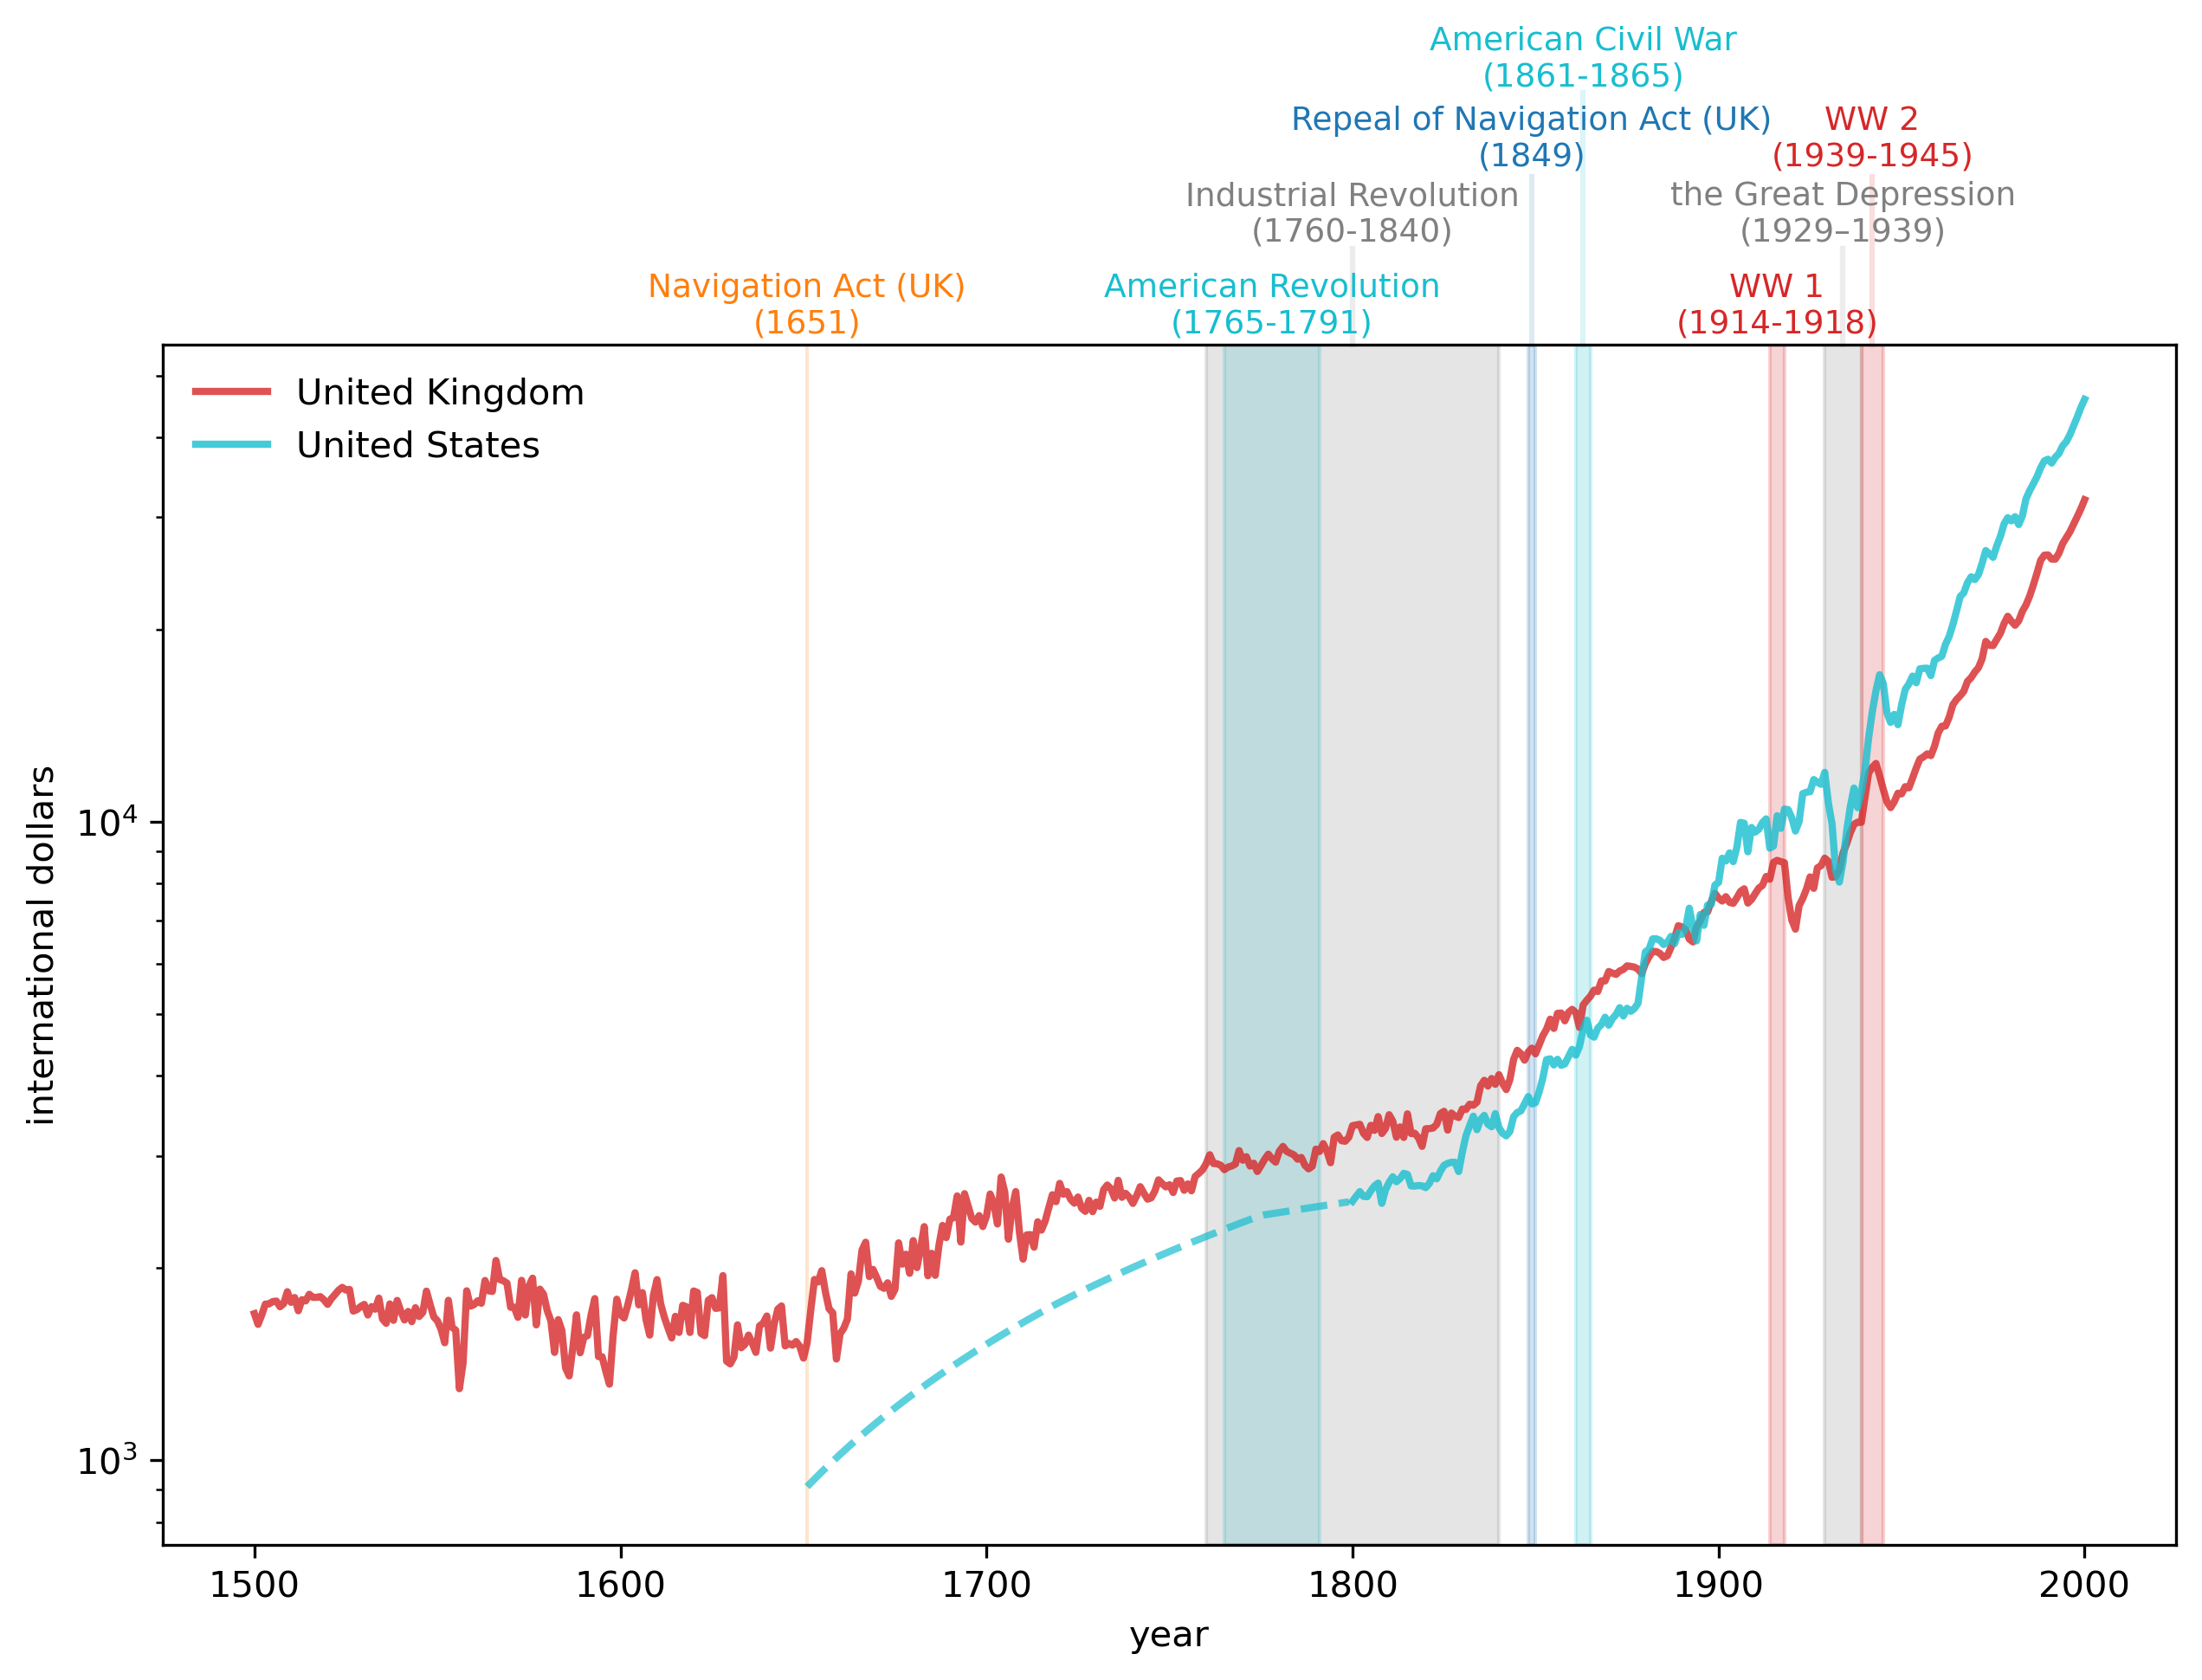

In [24]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:2000],
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points
events = [
    Event((1651, 1651), ylim + ylim*0.15, 
          'Navigation Act (UK)\n(1651)', 
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15, 
          'American Revolution\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1, 
          'Repeal of Navigation Act (UK)\n(1849)', 
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8, 
          'American Civil War\n(1861-1865)', 
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15, 
          'WW 1\n(1914-1918)', 
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1, 
          'WW 2\n(1939-1945)', 
          'tab:red', 1.14)
]

# Draw events
draw_events(events, ax)
plt.show()